In [1]:
import glob
import os

csv_dir = "/mnt/c/Users/Admin/MATLAB/Projects/my_project/csv_results"
all_files = glob.glob(os.path.join(csv_dir, "*.csv"))

variables = [
    "Backpr", "Extruder", "Flow_Rate", "Inject", "Nozzle",
    "Piston_Position", "Piston_Pressure", "Piston_Velocity", "Retract", "Volume"
]
selected_files = {}

for var in variables:
    matched = [f for f in all_files if var.lower() in os.path.basename(f).lower() and 'RID007' in f]
    matched_sorted = sorted(matched)
    selected_files[var] = matched_sorted[:120]
# 결과 확인
for var, files in selected_files.items():
    print(f"{var}: {len(files)} files")
    

Backpr: 117 files
Extruder: 117 files
Flow_Rate: 117 files
Inject: 117 files
Nozzle: 117 files
Piston_Position: 117 files
Piston_Pressure: 117 files
Piston_Velocity: 117 files
Retract: 117 files
Volume: 117 files


In [14]:
import pandas as pd

# 예시: 'Backpr' 데이터 병합
backpr_frames = []

for fpath in selected_files['Backpr']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath  # 추적을 위해 파일명도 저장
    backpr_frames.append(df)

backpr_df = pd.concat(backpr_frames, ignore_index=True)

/tmp/ipykernel_40654/941897787.py:9: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_40654/941897787.py:9: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_40654/941897787.py:9: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_40654/941897787.py:9: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_40654/941897787.py:9: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_40654/941897787.py:9: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


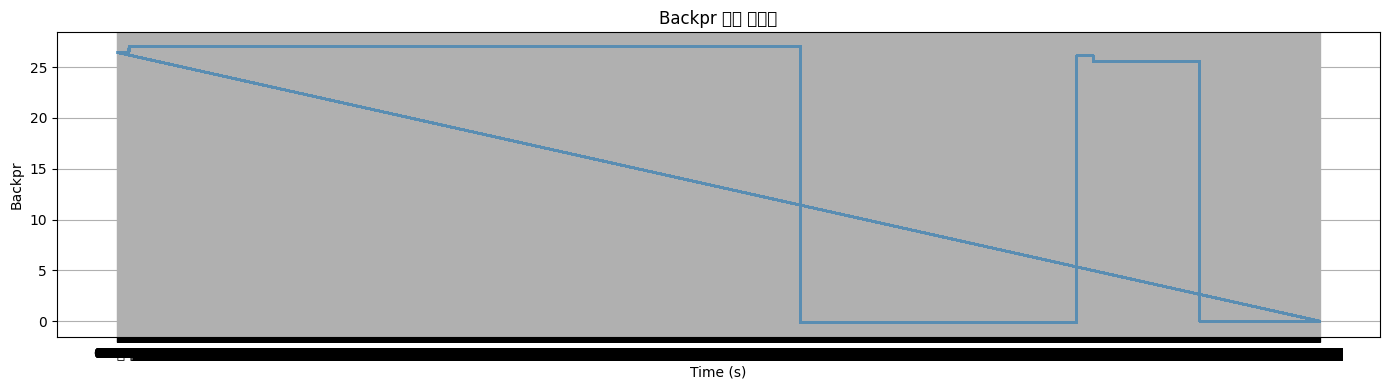

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(backpr_df['Time'], backpr_df['Backpr'], alpha=0.6)
plt.title('Backpr 전체 시계열')
plt.xlabel('Time (s)')
plt.ylabel('Backpr')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_59975/2556299547.py:25: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


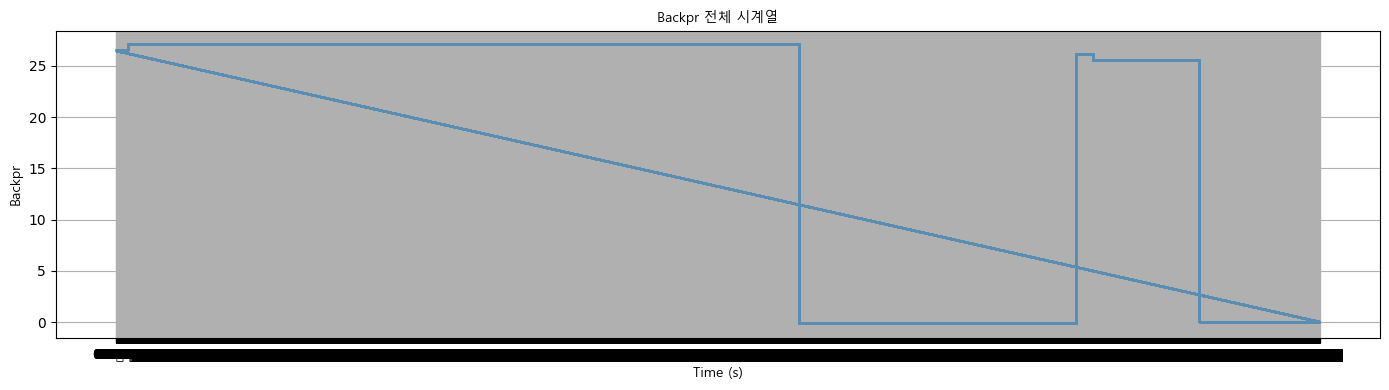

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 지정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 데이터 병합
backpr_frames = []
for fpath in selected_files["Backpr"]:
    df = pd.read_csv(fpath)
    df["source_file"] = fpath
    backpr_frames.append(df)

backpr_df = pd.concat(backpr_frames, ignore_index=True)

# 시각화
plt.figure(figsize=(14, 4))
plt.plot(backpr_df["Time"], backpr_df["Backpr"], alpha=0.6)
plt.title("Backpr 전체 시계열", fontproperties=fontprop)
plt.xlabel("Time (s)", fontproperties=fontprop)
plt.ylabel("Backpr", fontproperties=fontprop)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_59975/775376775.py:26: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


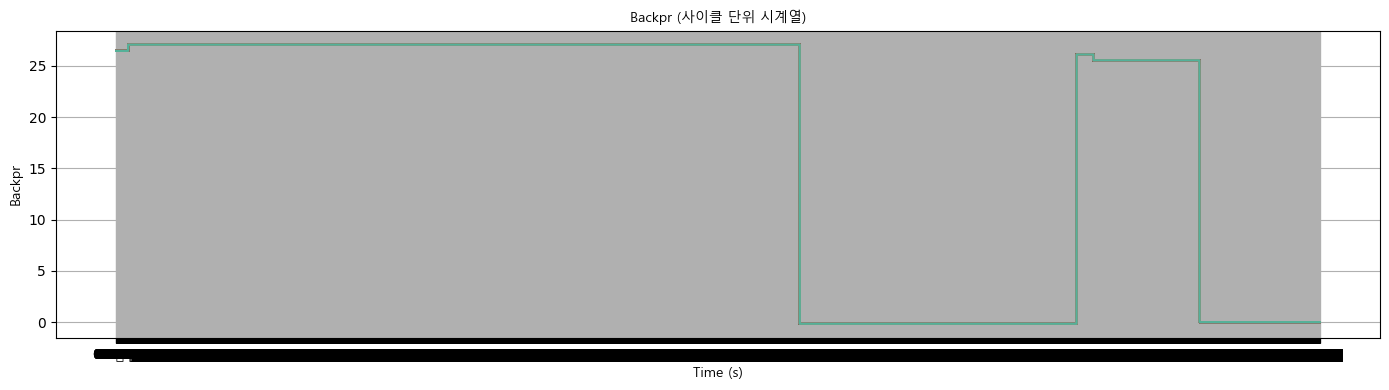

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🧩 source_file별로 연결된 시계열
backpr_frames = []
for fpath in selected_files["Backpr"]:
    df = pd.read_csv(fpath)
    df["source_file"] = fpath
    backpr_frames.append(df)

backpr_df = pd.concat(backpr_frames, ignore_index=True)

# 🎨 시각화
plt.figure(figsize=(14, 4))
for name, group in backpr_df.groupby("source_file"):
    plt.plot(group["Time"], group["Backpr"], alpha=0.6)

plt.title("Backpr (사이클 단위 시계열)", fontproperties=fontprop)
plt.xlabel("Time (s)", fontproperties=fontprop)
plt.ylabel("Backpr", fontproperties=fontprop)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_59975/2288484558.py:31: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


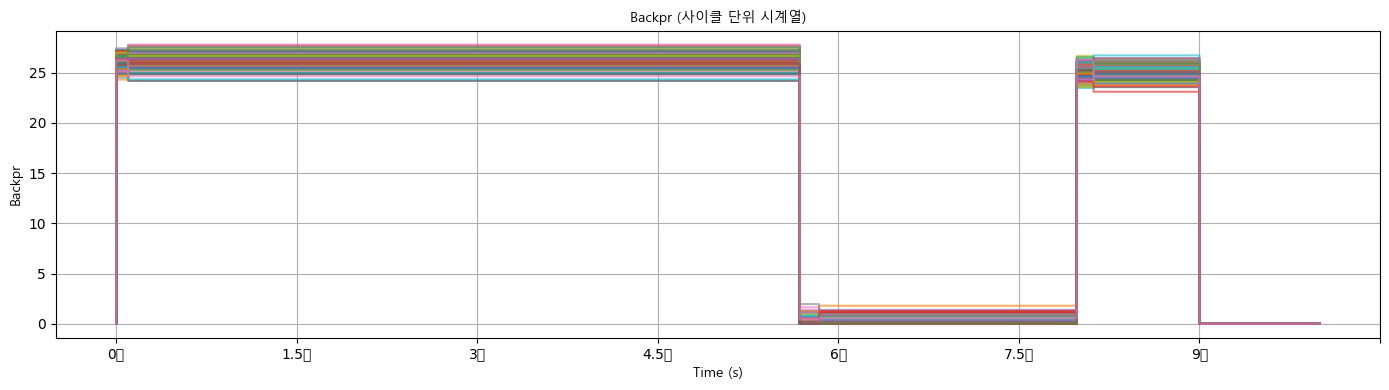

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import pandas as pd

# 🧷 한글 폰트 경로
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🧩 source_file별로 연결된 시계열
backpr_frames = []
for fpath in selected_files["Backpr"]:
    df = pd.read_csv(fpath)
    df["source_file"] = fpath
    backpr_frames.append(df)

backpr_df = pd.concat(backpr_frames, ignore_index=True)

# 🎨 시각화
plt.figure(figsize=(14, 4))
for name, group in backpr_df.groupby("source_file"):
    plt.plot(group["Time"], group["Backpr"], alpha=0.6)

plt.title("Backpr (사이클 단위 시계열)", fontproperties=fontprop)
plt.xlabel("Time (s)", fontproperties=fontprop)
plt.ylabel("Backpr", fontproperties=fontprop)

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) 

plt.grid(True)
plt.tight_layout()
plt.show()

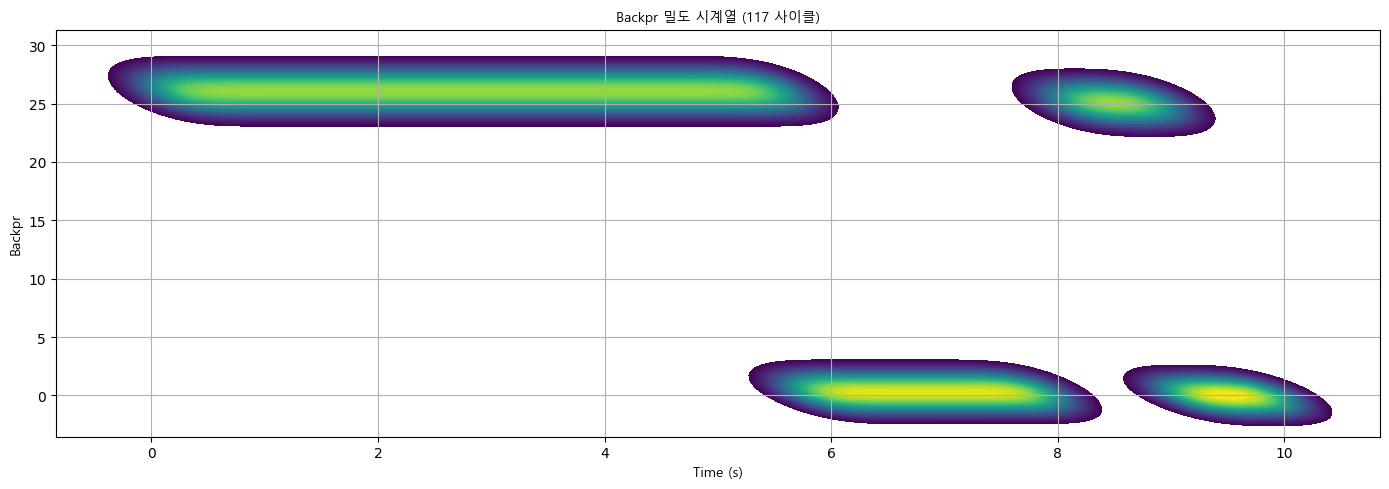

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🧷 한글 폰트
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 문자열 정제: "초" 제거 후 float 변환
backpr_df["Time"] = backpr_df["Time"].str.replace("초", "", regex=False).astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)
# float 형 변환 보장
backpr_df["Time"] = backpr_df["Time"].astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)

# 🎨 커널 밀도 기반 2D 시각화
plt.figure(figsize=(14, 5))
sns.kdeplot(
    data=backpr_df,
    x="Time",
    y="Backpr",
    fill=True,
    cmap="viridis",  # 또는 "magma", "plasma", "rocket"
    thresh=0.05,
    levels=100
)

plt.title("Backpr 밀도 시계열 (117 사이클)", fontproperties=fontprop)
plt.xlabel("Time (s)", fontproperties=fontprop)
plt.ylabel("Backpr", fontproperties=fontprop)
plt.grid(True)
plt.tight_layout()
plt.show()

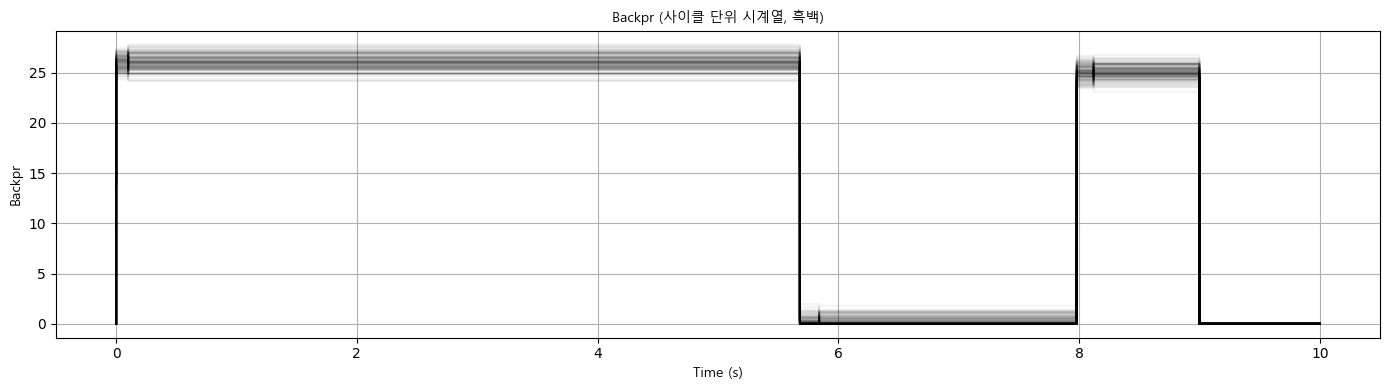

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(14, 4))

for name, group in backpr_df.groupby("source_file"):
    plt.plot(group["Time"], group["Backpr"], color='black', alpha=0.05)  # 낮은 alpha로 겹침 표현

plt.title("Backpr (사이클 단위 시계열, 흑백)", fontproperties=fontprop)
plt.xlabel("Time (s)", fontproperties=fontprop)
plt.ylabel("Backpr", fontproperties=fontprop)
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

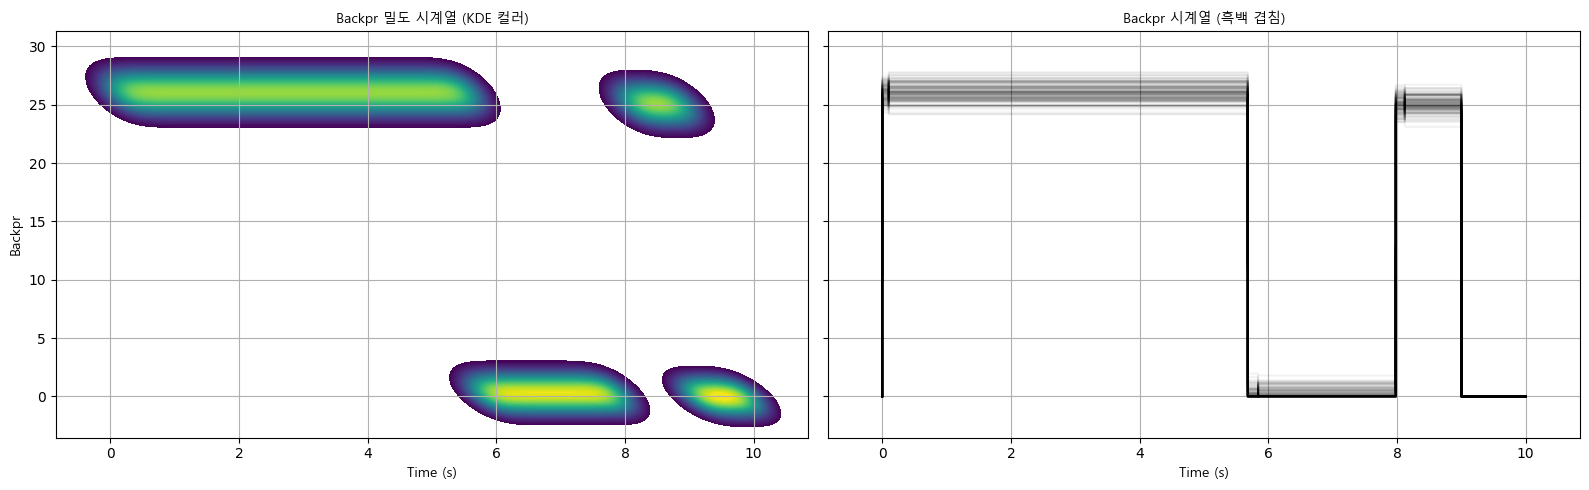

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 형변환 보장
backpr_df["Time"] = backpr_df["Time"].astype(str).str.replace("초", "").astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)

# subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 컬러 밀도 기반 KDE
sns.kdeplot(
    data=backpr_df,
    x="Time",
    y="Backpr",
    fill=True,
    cmap="viridis",
    thresh=0.05,
    levels=100,
    ax=axes[0]
)
axes[0].set_title("Backpr 밀도 시계열 (KDE 컬러)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Backpr", fontproperties=fontprop)

## 🎨 오른쪽: 흑백 겹침 시각화
for _, group in backpr_df.groupby("source_file"):
    axes[1].plot(group["Time"], group["Backpr"], color='black', alpha=0.05)
axes[1].set_title("Backpr 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 제목 생략

# 공통 설정
for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()

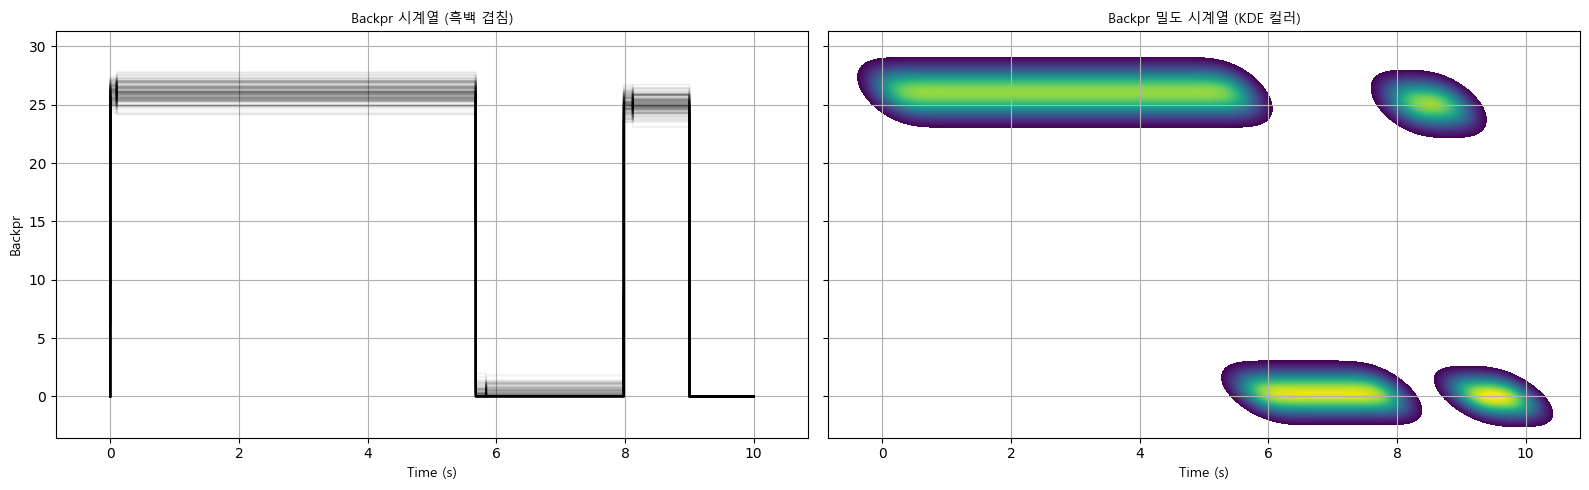

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 형 변환 보장
backpr_df["Time"] = backpr_df["Time"].astype(str).str.replace("초", "").astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)

# subplot 구성 (좌: 흑백, 우: 컬러 KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침
for _, group in backpr_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Backpr"], color='black', alpha=0.05)
axes[0].set_title("Backpr 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Backpr", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: 컬러 KDE 밀도
sns.kdeplot(
    data=backpr_df,
    x="Time",
    y="Backpr",
    fill=True,
    cmap="viridis",
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Backpr 밀도 시계열 (KDE 컬러)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 형 변환 보장
backpr_df["Time"] = backpr_df["Time"].astype(str).str.replace("초", "").astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)

# subplot 구성 (좌: 흑백, 우: 컬러 KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침
for _, group in backpr_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Backpr"], color='black', alpha=0.05)
axes[0].set_title("Backpr 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Backpr", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: 컬러 KDE 밀도
sns.kdeplot(
    data=backpr_df,
    x="Time",
    y="Backpr",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Backpr 밀도 시계열 (KDE 컬러)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [30]:
import pandas as pd

extruder_frames = []

for fpath in selected_files['Extruder']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath  # 추적을 위해 파일명도 저장
    extruder_frames.append(df)

extruder_df = pd.concat(extruder_frames, ignore_index=True)

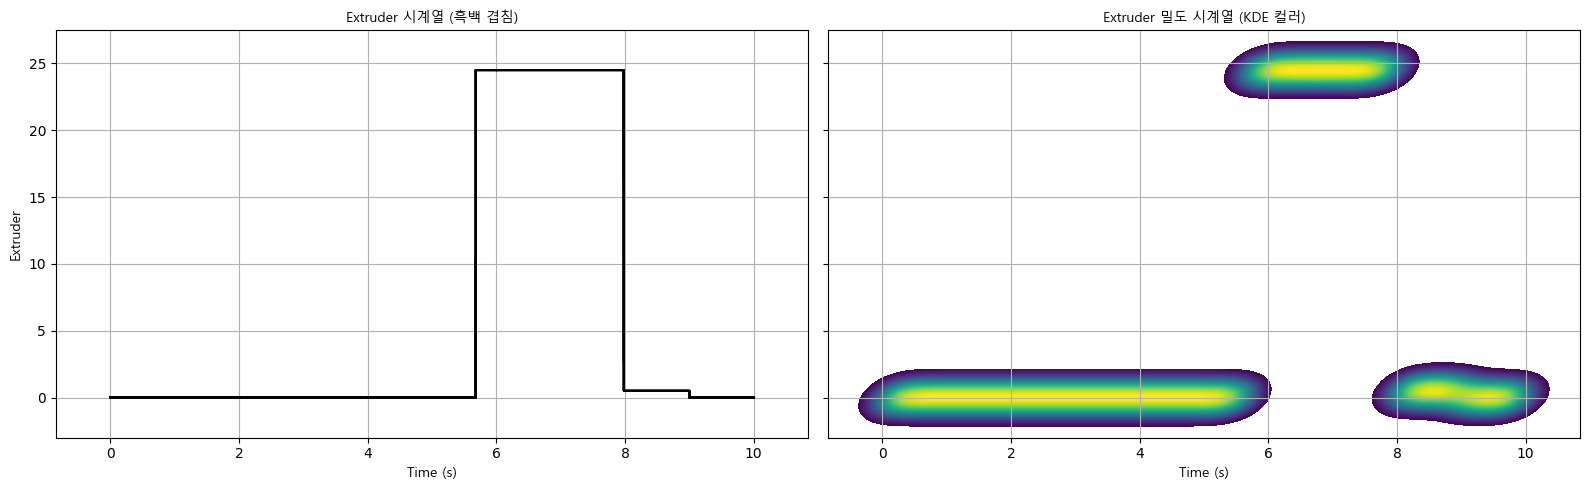

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 형 변환 보장
extruder_df["Time"] = extruder_df["Time"].astype(str).str.replace("초", "").astype(float)
extruder_df["Extruder"] = extruder_df["Extruder"].astype(float)

# subplot 구성 (좌: 흑백, 우: 컬러 KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침
for _, group in extruder_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Extruder"], color='black', alpha=0.05)
axes[0].set_title("Extruder 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Extruder", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: 컬러 KDE 밀도
sns.kdeplot(
    data=extruder_df,
    x="Time",
    y="Extruder",
    fill=True,
    cmap="viridis",
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Extruder 밀도 시계열 (KDE 컬러)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

plt.tight_layout()
plt.show()

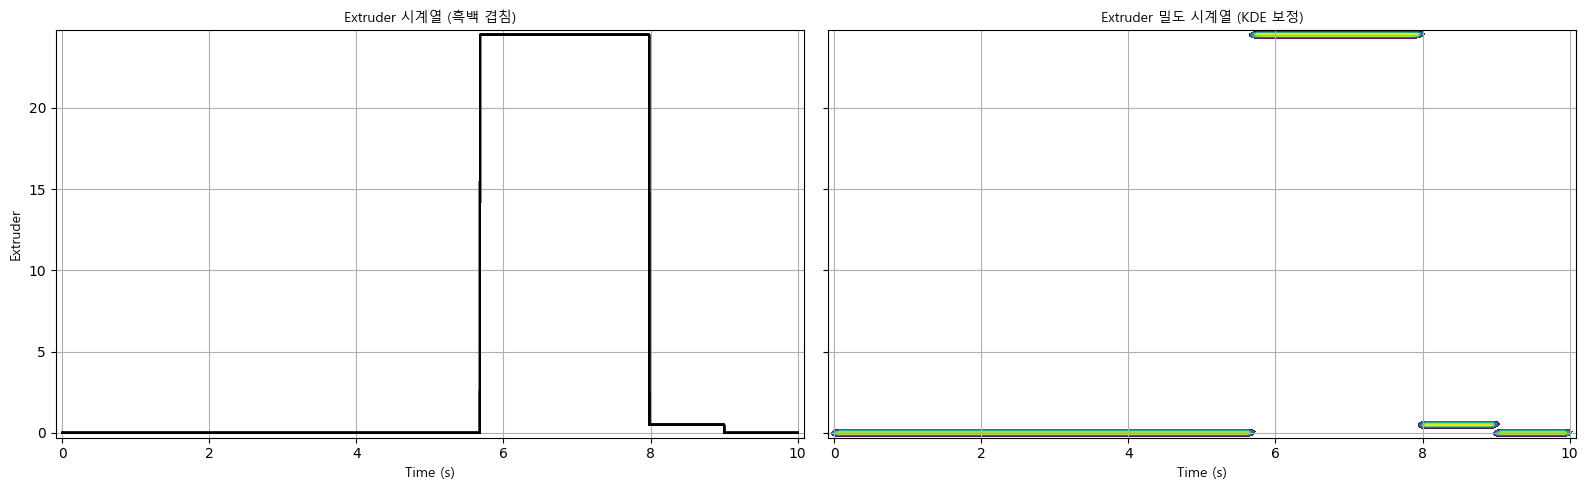

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 형 변환
extruder_df["Time"] = extruder_df["Time"].astype(str).str.replace("초", "").astype(float)
extruder_df["Extruder"] = extruder_df["Extruder"].astype(float)

# subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침
for _, group in extruder_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Extruder"], color='black', alpha=0.05)
axes[0].set_title("Extruder 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Extruder", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: KDE 시각화 with bw_adjust 보정
sns.kdeplot(
    data=extruder_df,
    x="Time",
    y="Extruder",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,   # ⬅️ 커널 폭을 1/10로 축소
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Extruder 밀도 시계열 (KDE 보정)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [32]:
extruder_df.groupby("source_file")["Extruder"].nunique().value_counts()

Extruder
3    117
Name: count, dtype: int64

🔧 수직 std 평균: 0.00000 → 적용된 bw_adjust: 0.100


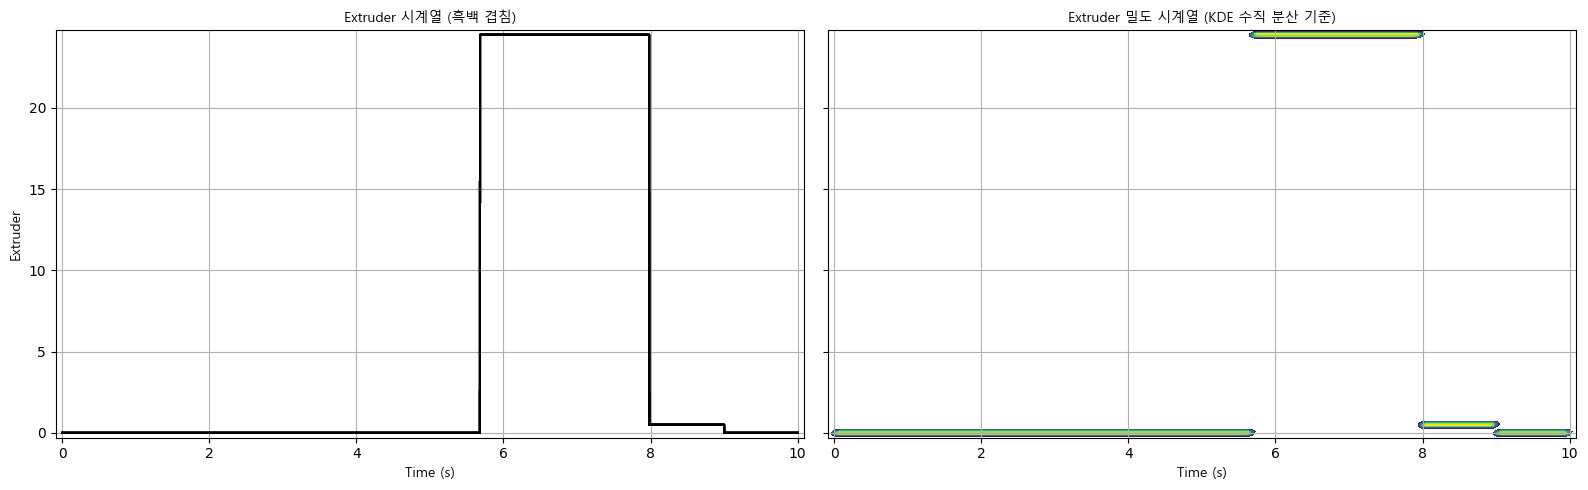

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 변환
extruder_df["Time"] = extruder_df["Time"].astype(str).str.replace("초", "").astype(float)
extruder_df["Extruder"] = extruder_df["Extruder"].astype(float)

# ✅ 수직 기준 분산 계산 (Time별로 117개 사이클 값의 분산)
pivot = extruder_df.pivot(index="Time", columns="source_file", values="Extruder")
vertical_std = pivot.std(axis=1)  # 시간 t별로 117개 시계열의 분산
avg_vertical_std = vertical_std.mean()

# bw_adjust 계산
target_std = 2.0
bw_adjust = max(avg_vertical_std / target_std, 0.1)  # 최소 보장

print(f"🔧 수직 std 평균: {avg_vertical_std:.5f} → 적용된 bw_adjust: {bw_adjust:.3f}")

# subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침
for _, group in extruder_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Extruder"], color='black', alpha=0.05)
axes[0].set_title("Extruder 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Extruder", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: KDE 컬러 시각화 (bw_adjust 적용)
sns.kdeplot(
    data=extruder_df,
    x="Time",
    y="Extruder",
    fill=True,
    cmap="viridis",
    bw_adjust=bw_adjust,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Extruder 밀도 시계열 (KDE 수직 분산 기준)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

plt.tight_layout()
plt.show()

🔧 수직 std 평균: 0.59606 → 적용된 bw_adjust: 0.298


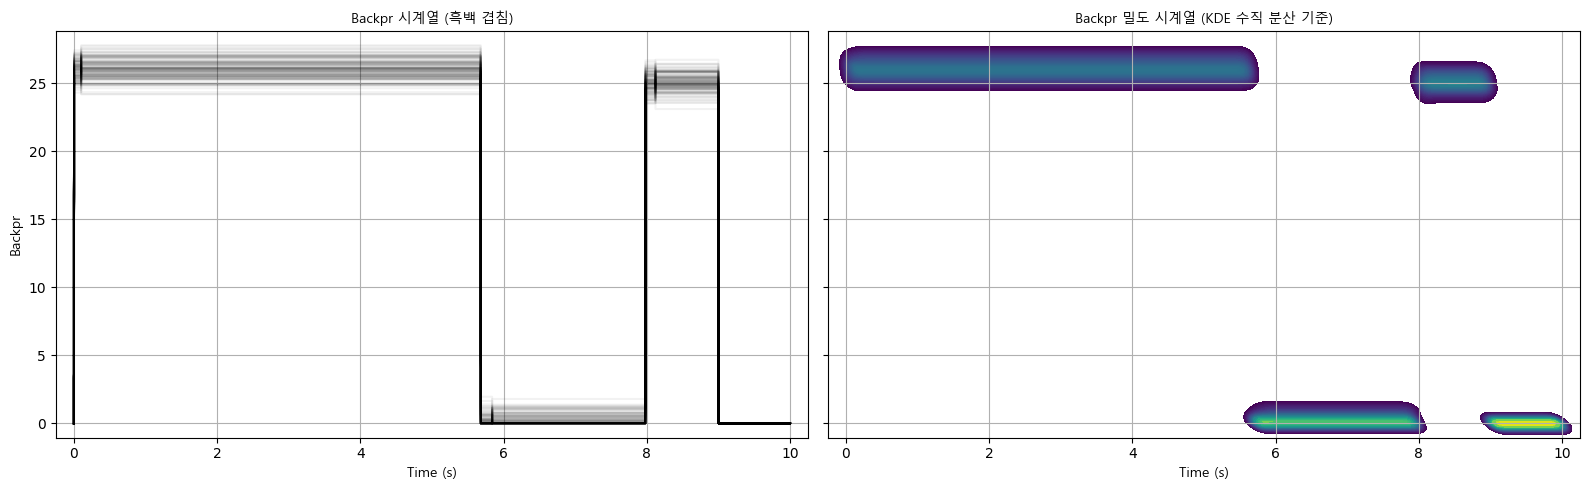

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 변환
backpr_df["Time"] = backpr_df["Time"].astype(str).str.replace("초", "").astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)

# ✅ 수직 기준 분산 계산 (Time별로 117개 사이클 값의 분산)
pivot = backpr_df.pivot(index="Time", columns="source_file", values="Backpr")
vertical_std = pivot.std(axis=1)  # 시간 t별로 117개 시계열의 분산
avg_vertical_std = vertical_std.mean()

# bw_adjust 계산
target_std = 2.0
bw_adjust = max(avg_vertical_std / target_std, 0.1)  # 최소 보장

print(f"🔧 수직 std 평균: {avg_vertical_std:.5f} → 적용된 bw_adjust: {bw_adjust:.3f}")

# subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침
for _, group in backpr_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Backpr"], color='black', alpha=0.05)
axes[0].set_title("Backpr 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Backpr", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: KDE 컬러 시각화 (bw_adjust 적용)
sns.kdeplot(
    data=backpr_df,
    x="Time",
    y="Backpr",
    fill=True,
    cmap="viridis",
    bw_adjust=bw_adjust,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Backpr 밀도 시계열 (KDE 수직 분산 기준)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

plt.tight_layout()
plt.show()

🔧 수직 std 평균: 0.59606 → 적용된 bw_adjust: 0.298


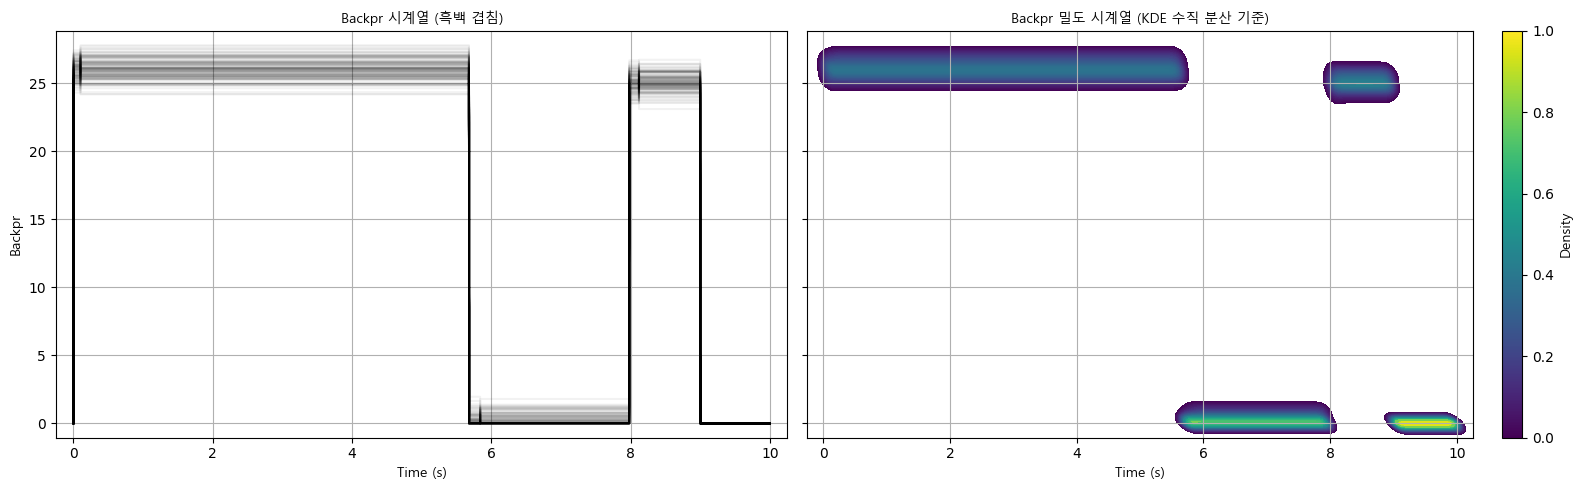

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
import numpy as np

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 변환
backpr_df["Time"] = backpr_df["Time"].astype(str).str.replace("초", "").astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)

# ✅ 수직 기준 분산 계산
pivot = backpr_df.pivot(index="Time", columns="source_file", values="Backpr")
vertical_std = pivot.std(axis=1)
avg_vertical_std = vertical_std.mean()
bw_adjust = max(avg_vertical_std / 2.0, 0.1)

print(f"🔧 수직 std 평균: {avg_vertical_std:.5f} → 적용된 bw_adjust: {bw_adjust:.3f}")

# 🎨 subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 좌: 흑백 시계열
for _, group in backpr_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Backpr"], color='black', alpha=0.05)
axes[0].set_title("Backpr 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Backpr", fontproperties=fontprop)
axes[0].grid(True)

## 우: KDE 시각화
kdeplot = sns.kdeplot(
    data=backpr_df,
    x="Time",
    y="Backpr",
    fill=True,
    cmap="viridis",
    bw_adjust=bw_adjust,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)

axes[1].set_title("Backpr 밀도 시계열 (KDE 수직 분산 기준)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# 📌 colorbar 추가
mappable = cm.ScalarMappable(cmap="viridis")
cbar = plt.colorbar(mappable, ax=axes[1], fraction=0.05, pad=0.04)
cbar.set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

🔧 수직 std 평균: 0.00000 → 적용된 bw_adjust: 0.100


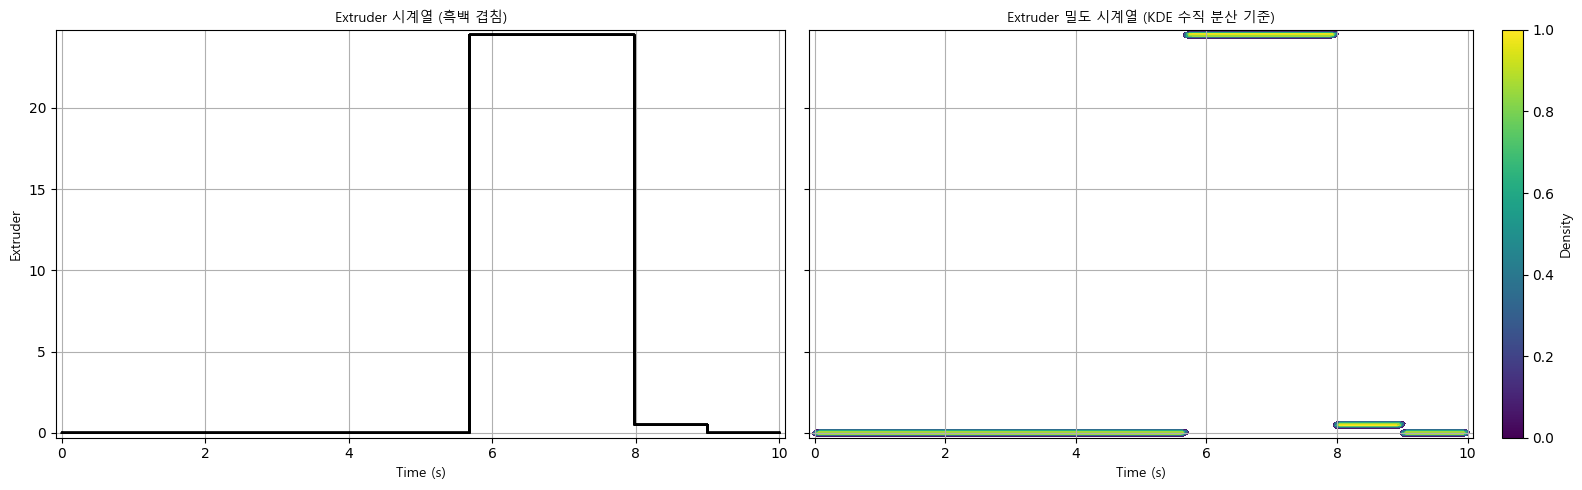

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 변환
extruder_df["Time"] = extruder_df["Time"].astype(str).str.replace("초", "").astype(float)
extruder_df["Extruder"] = extruder_df["Extruder"].astype(float)

# ✅ 수직 기준 분산 계산 (Time별로 117개 사이클 값의 분산)
pivot = extruder_df.pivot(index="Time", columns="source_file", values="Extruder")
vertical_std = pivot.std(axis=1)  # 시간 t별로 117개 시계열의 분산
avg_vertical_std = vertical_std.mean()

# bw_adjust 계산
target_std = 2.0
bw_adjust = max(avg_vertical_std / target_std, 0.1)  # 최소 보장

print(f"🔧 수직 std 평균: {avg_vertical_std:.5f} → 적용된 bw_adjust: {bw_adjust:.3f}")

# subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침
for _, group in extruder_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Extruder"], color='black', alpha=0.05)
axes[0].set_title("Extruder 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Extruder", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: KDE 컬러 시각화 (bw_adjust 적용)
sns.kdeplot(
    data=extruder_df,
    x="Time",
    y="Extruder",
    fill=True,
    cmap="viridis",
    bw_adjust=bw_adjust,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Extruder 밀도 시계열 (KDE 수직 분산 기준)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

# 📌 colorbar 추가
mappable = cm.ScalarMappable(cmap="viridis")
cbar = plt.colorbar(mappable, ax=axes[1], fraction=0.05, pad=0.04)
cbar.set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

🔧 Inject 수직 std 평균: 0.79162 → 적용된 bw_adjust: 0.396


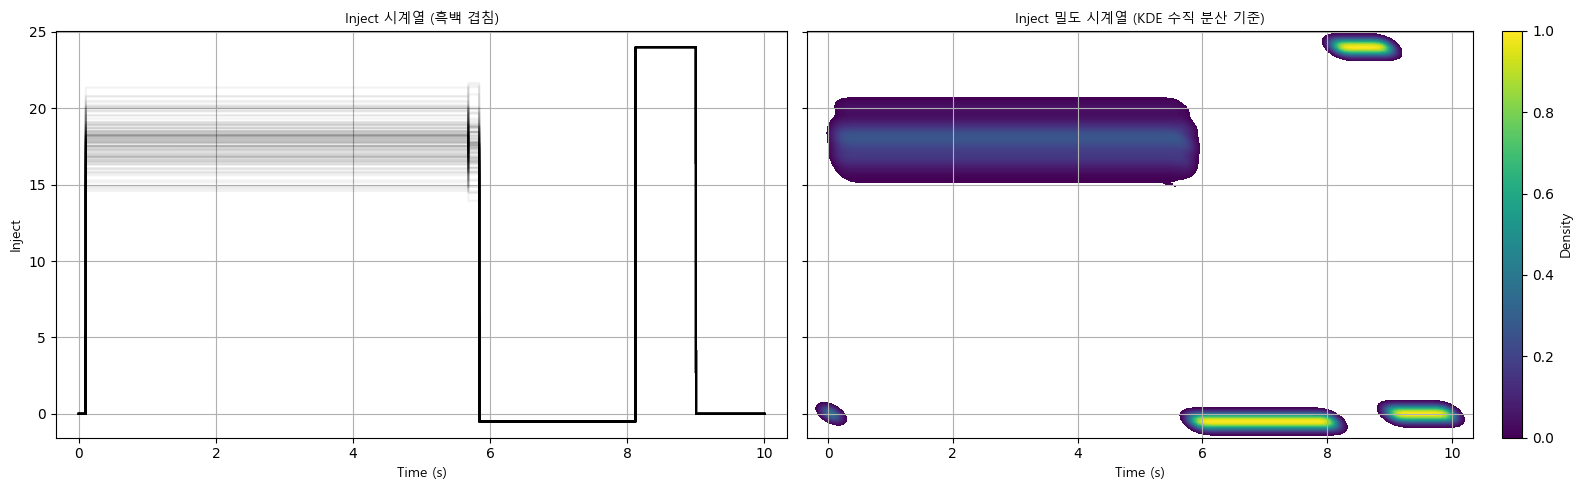

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
import numpy as np

# ✅ 1. inject 데이터 병합
inject_frames = []

for fpath in selected_files['Inject']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    inject_frames.append(df)

inject_df = pd.concat(inject_frames, ignore_index=True)

# ✅ 2. 시각화 준비
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# float 변환
inject_df["Time"] = inject_df["Time"].astype(str).str.replace("초", "").astype(float)
inject_df["Inject"] = inject_df["Inject"].astype(float)

# ✅ 수직 기준 분산 계산
pivot = inject_df.pivot(index="Time", columns="source_file", values="Inject")
vertical_std = pivot.std(axis=1)
avg_vertical_std = vertical_std.mean()
bw_adjust = max(avg_vertical_std / 2.0, 0.1)

print(f"🔧 Inject 수직 std 평균: {avg_vertical_std:.5f} → 적용된 bw_adjust: {bw_adjust:.3f}")

# ✅ 3. 시각화 (좌: 시계열, 우: KDE + colorbar)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 좌측 흑백 시계열
for _, group in inject_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Inject"], color='black', alpha=0.05)
axes[0].set_title("Inject 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Inject", fontproperties=fontprop)
axes[0].grid(True)

## 우측 KDE
sns.kdeplot(
    data=inject_df,
    x="Time",
    y="Inject",
    fill=True,
    cmap="viridis",
    bw_adjust=bw_adjust,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Inject 밀도 시계열 (KDE 수직 분산 기준)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# colorbar 추가
mappable = cm.ScalarMappable(cmap="viridis")
cbar = plt.colorbar(mappable, ax=axes[1], fraction=0.05, pad=0.04)
cbar.set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

🔧 수직 std 평균: 1.23180 → 적용된 bw_adjust: 0.616


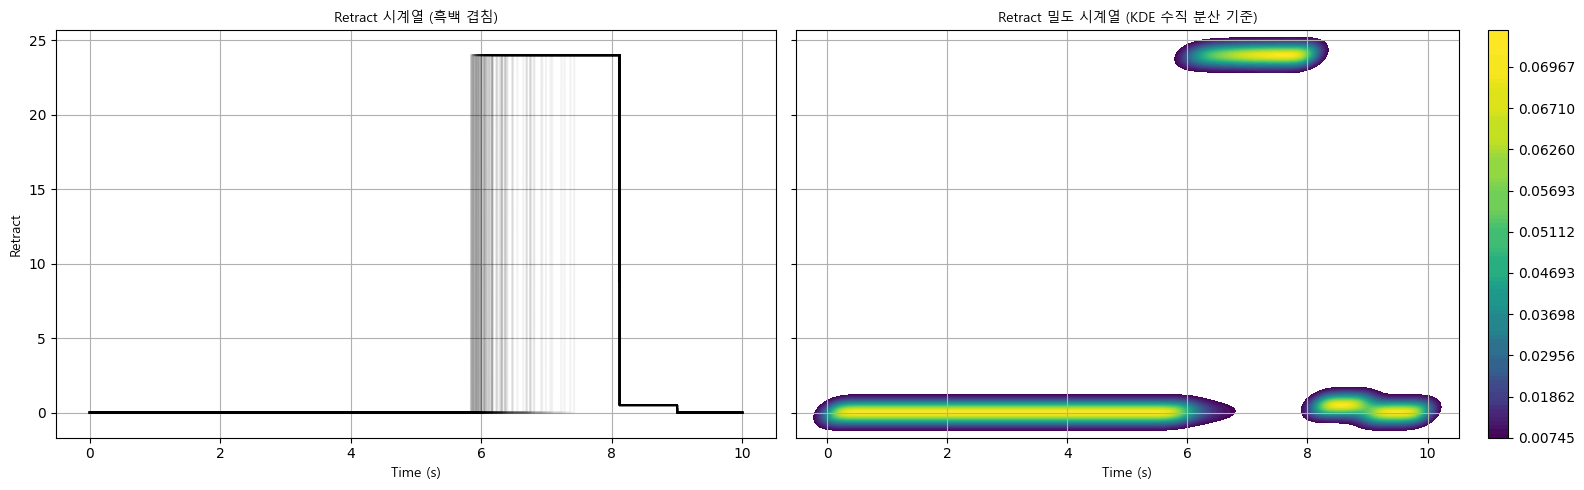

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 데이터 병합
retract_frames = []
for fpath in selected_files['Retract']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath  # 추적용 파일명 컬럼
    retract_frames.append(df)

retract_df = pd.concat(retract_frames, ignore_index=True)

# ⏱ float 변환
retract_df["Time"] = retract_df["Time"].astype(str).str.replace("초", "").astype(float)
retract_df["Retract"] = retract_df["Retract"].astype(float)

# ✅ 수직 기준 분산 계산 (Time별로 117개 사이클 값의 분산)
pivot = retract_df.pivot(index="Time", columns="source_file", values="Retract")
vertical_std = pivot.std(axis=1)  # 시간 t별로 117개 시계열의 분산
avg_vertical_std = vertical_std.mean()

# bw_adjust 계산
target_std = 2.0
bw_adjust = max(avg_vertical_std / target_std, 0.1)  # 최소 보장

print(f"🔧 수직 std 평균: {avg_vertical_std:.5f} → 적용된 bw_adjust: {bw_adjust:.3f}")

# 📊 시각화 (2패널: 흑백 + 컬러 KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## 🎨 왼쪽: 흑백 겹침 시계열
for _, group in retract_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Retract"], color='black', alpha=0.05)
axes[0].set_title("Retract 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Retract", fontproperties=fontprop)
axes[0].grid(True)

## 🎨 오른쪽: KDE 밀도 시각화 + colorbar
kde = sns.kdeplot(
    data=retract_df,
    x="Time",
    y="Retract",
    fill=True,
    cmap="viridis",
    bw_adjust=bw_adjust,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Retract 밀도 시계열 (KDE 수직 분산 기준)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 생략
axes[1].grid(True)

# ✅ colorbar 추가
mappable = kde.get_children()[0]  # QuadMesh 객체 추출
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04)

plt.tight_layout()
plt.show()

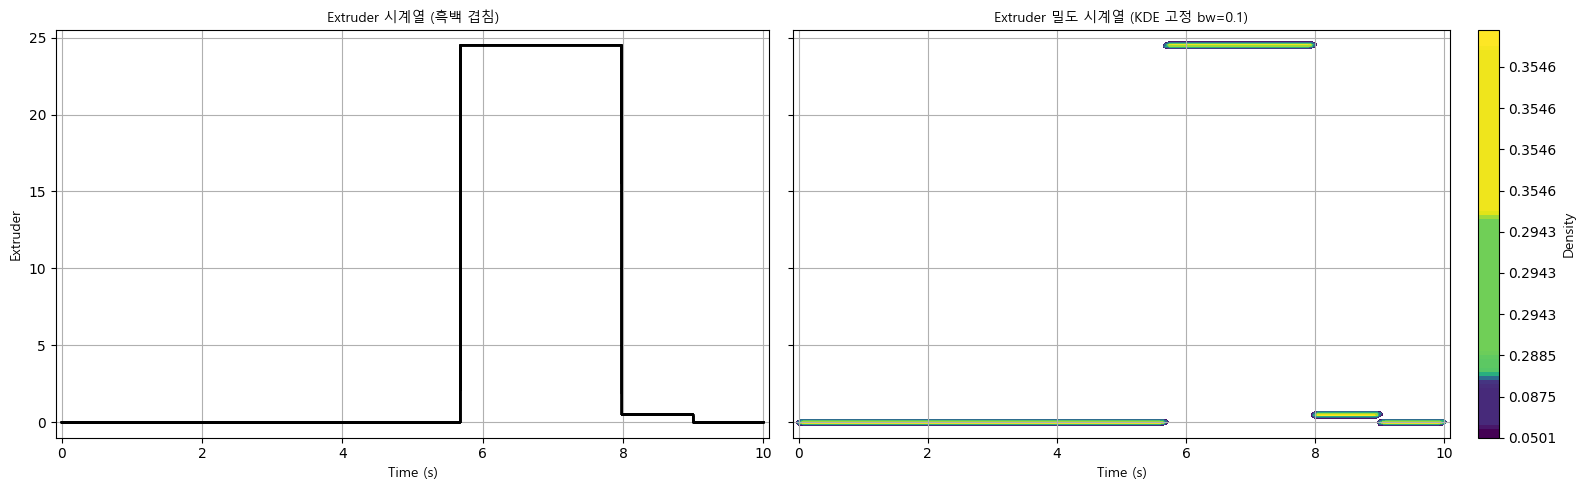

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Extruder 데이터 병합
extruder_frames = []
for fpath in selected_files['Extruder']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    extruder_frames.append(df)

extruder_df = pd.concat(extruder_frames, ignore_index=True)

# ⏱ float 변환
extruder_df["Time"] = extruder_df["Time"].astype(str).str.replace("초", "").astype(float)
extruder_df["Extruder"] = extruder_df["Extruder"].astype(float)

# 🎨 subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in extruder_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Extruder"], color='black', alpha=0.05)
axes[0].set_title("Extruder 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Extruder", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE
kde = sns.kdeplot(
    data=extruder_df,
    x="Time",
    y="Extruder",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Extruder 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ✅ ylim: min/max 모두 여유 확보
ymin = extruder_df["Extruder"].min()
ymax = extruder_df["Extruder"].max()
axes[1].set_ylim(ymin - 1, ymax + 1)

# ✅ colorbar (정확한 KDE 결과 기반)
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

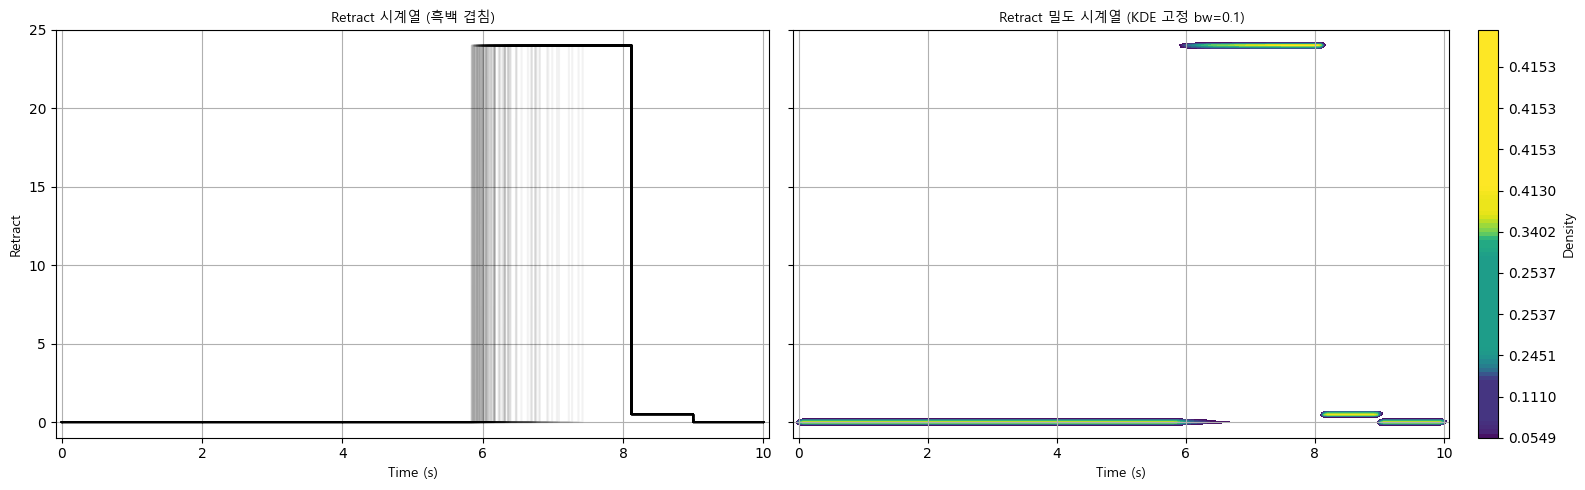

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Retract 데이터 병합
retract_frames = []
for fpath in selected_files['Retract']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    retract_frames.append(df)

retract_df = pd.concat(retract_frames, ignore_index=True)

# ⏱ float 변환
retract_df["Time"] = retract_df["Time"].astype(str).str.replace("초", "").astype(float)
retract_df["Retract"] = retract_df["Retract"].astype(float)

# 🎨 subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in retract_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Retract"], color='black', alpha=0.05)
axes[0].set_title("Retract 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Retract", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE
kde = sns.kdeplot(
    data=retract_df,
    x="Time",
    y="Retract",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Retract 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ✅ ylim: min/max 모두 여유 확보
ymin = retract_df["Retract"].min()
ymax = retract_df["Retract"].max()
axes[1].set_ylim(ymin - 1, ymax + 1)

# ✅ colorbar (정확한 KDE 결과 기반)
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

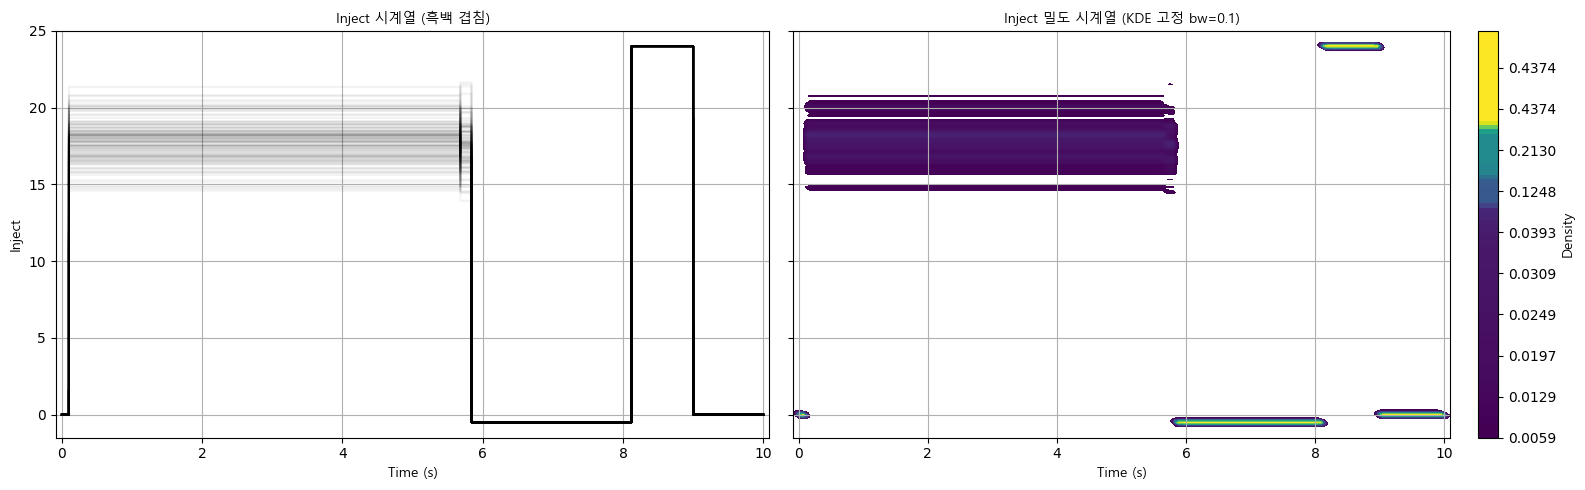

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Inject 데이터 병합
inject_frames = []
for fpath in selected_files['Inject']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    inject_frames.append(df)

inject_df = pd.concat(inject_frames, ignore_index=True)

# ⏱ float 변환
inject_df["Time"] = inject_df["Time"].astype(str).str.replace("초", "").astype(float)
inject_df["Inject"] = inject_df["Inject"].astype(float)

# 🎨 subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in inject_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Inject"], color='black', alpha=0.05)
axes[0].set_title("Inject 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Inject", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE
kde = sns.kdeplot(
    data=inject_df,
    x="Time",
    y="Inject",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Inject 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ✅ ylim: min/max 모두 여유 확보
ymin = inject_df["Inject"].min()
ymax = inject_df["Inject"].max()
axes[1].set_ylim(ymin - 1, ymax + 1)

# ✅ colorbar (정확한 KDE 결과 기반)
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

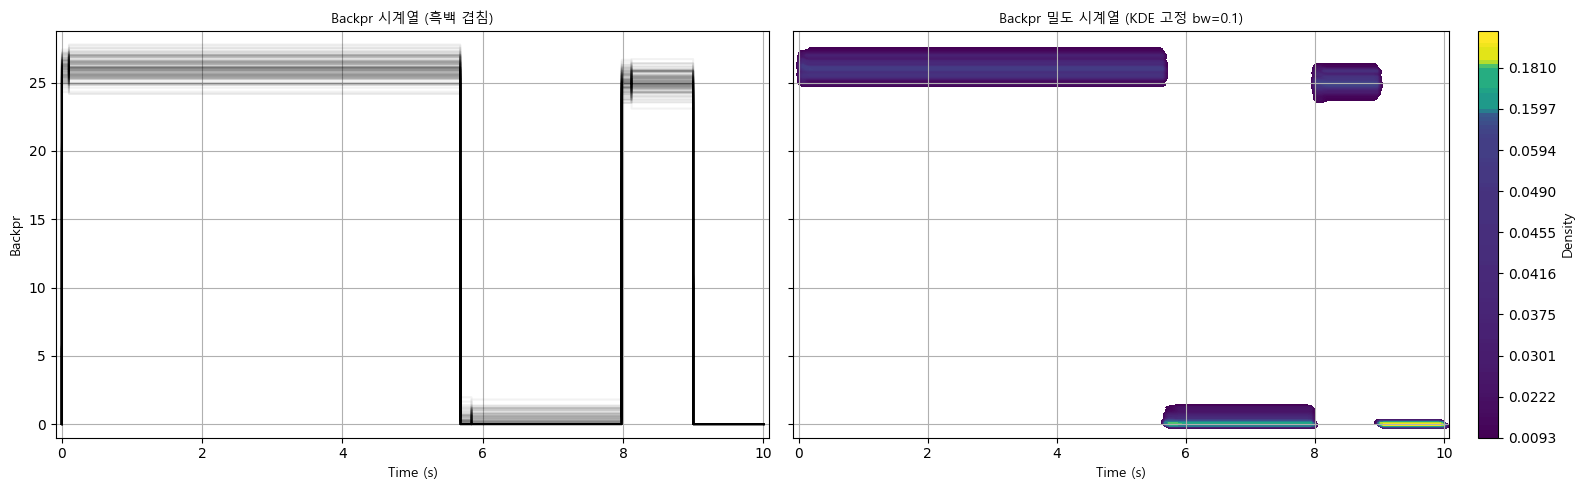

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Backpr 데이터 병합
backpr_frames = []
for fpath in selected_files['Backpr']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    backpr_frames.append(df)

backpr_df = pd.concat(backpr_frames, ignore_index=True)

# ⏱ float 변환
backpr_df["Time"] = backpr_df["Time"].astype(str).str.replace("초", "").astype(float)
backpr_df["Backpr"] = backpr_df["Backpr"].astype(float)

# 🎨 subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in backpr_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Backpr"], color='black', alpha=0.05)
axes[0].set_title("Backpr 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Backpr", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE
kde = sns.kdeplot(
    data=backpr_df,
    x="Time",
    y="Backpr",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Backpr 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ✅ ylim: min/max 모두 여유 확보
ymin = backpr_df["Backpr"].min()
ymax = backpr_df["Backpr"].max()
axes[1].set_ylim(ymin - 1, ymax + 1)

# ✅ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

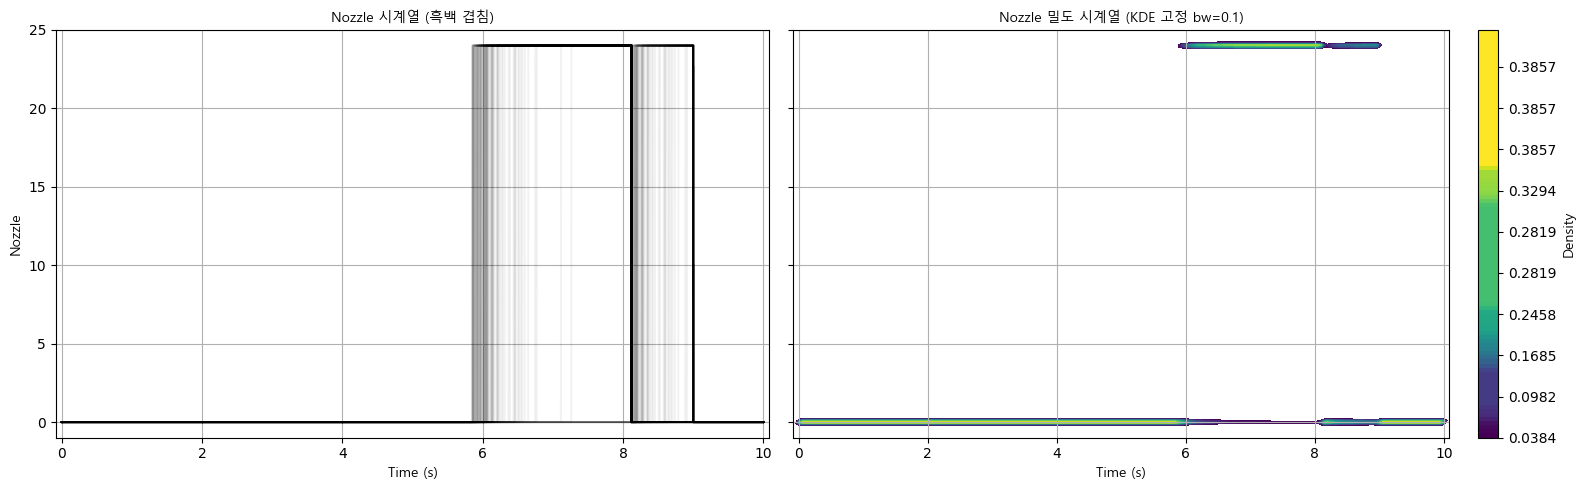

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Nozzle 데이터 병합
nozzle_frames = []
for fpath in selected_files['Nozzle']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    nozzle_frames.append(df)

nozzle_df = pd.concat(nozzle_frames, ignore_index=True)

# ⏱ float 변환
nozzle_df["Time"] = nozzle_df["Time"].astype(str).str.replace("초", "").astype(float)
nozzle_df["Nozzle"] = nozzle_df["Nozzle"].astype(float)

# 🎨 subplot 구성
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in nozzle_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Nozzle"], color='black', alpha=0.05)
axes[0].set_title("Nozzle 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Nozzle", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE 시각화
kde = sns.kdeplot(
    data=nozzle_df,
    x="Time",
    y="Nozzle",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Nozzle 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ✅ ylim: 여유 확보
ymin = nozzle_df["Nozzle"].min()
ymax = nozzle_df["Nozzle"].max()
axes[1].set_ylim(ymin - 1, ymax + 1)

# ✅ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

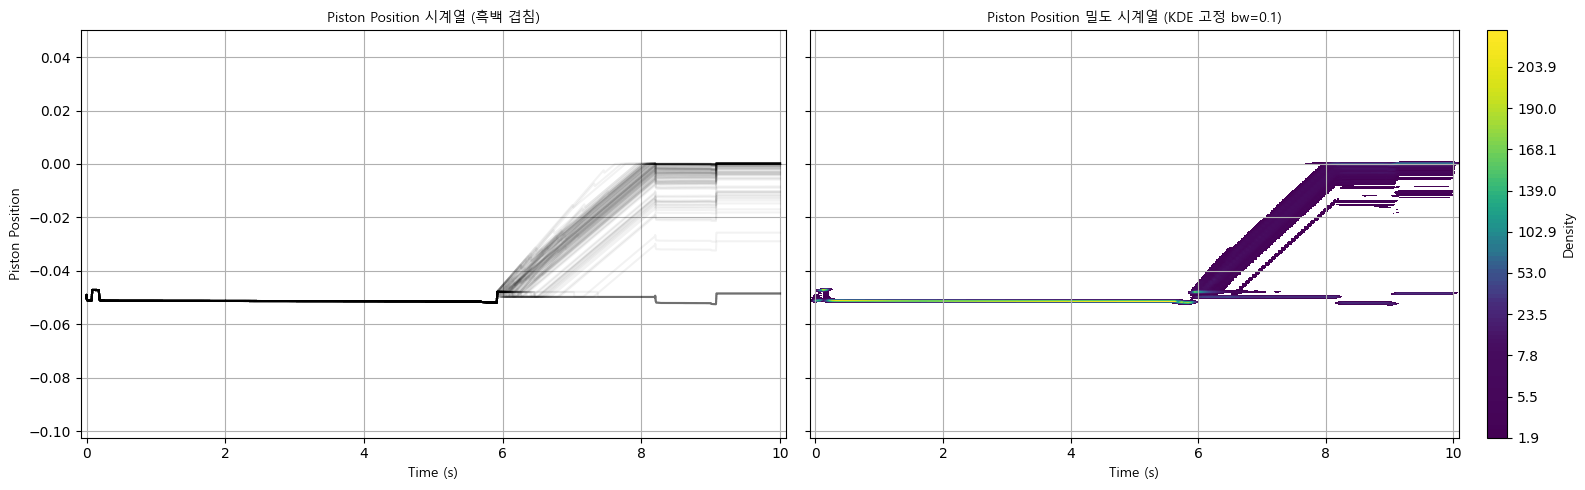

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Position 데이터 병합
position_frames = []
for fpath in selected_files['Piston_Position']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    position_frames.append(df)

position_df = pd.concat(position_frames, ignore_index=True)

# ⏱ float 변환
position_df["Time"] = position_df["Time"].astype(str).str.replace("초", "").astype(float)
position_df["Piston_Position"] = position_df["Piston_Position"].astype(float)

# 🎨 subplot 구성 (좌: 흑백, 우: KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in position_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Piston_Position"], color='black', alpha=0.05)
axes[0].set_title("Piston Position 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Piston Position", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE + colorbar
kde = sns.kdeplot(
    data=position_df,
    x="Time",
    y="Piston_Position",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Piston Position 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ▶ y축 여유 공간 확보
ymin, ymax = position_df["Piston_Position"].min(), position_df["Piston_Position"].max()
axes[0].set_ylim(ymin - 0.05, ymax + 0.05)
axes[1].set_ylim(ymin - 0.05, ymax + 0.05)

# ▶ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

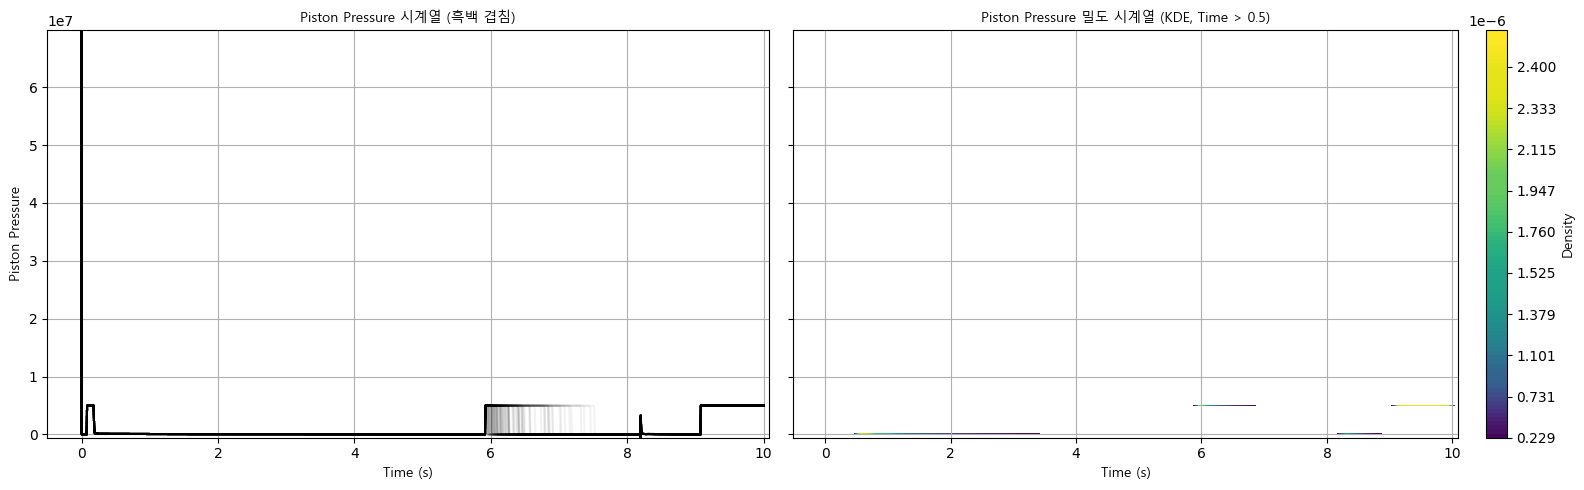

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Pressure 데이터 병합
pressure_frames = []
for fpath in selected_files['Piston_Pressure']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    pressure_frames.append(df)

pressure_df = pd.concat(pressure_frames, ignore_index=True)

# ⏱ float 변환
pressure_df["Time"] = pressure_df["Time"].astype(str).str.replace("초", "").astype(float)
pressure_df["Piston_Pressure"] = pressure_df["Piston_Pressure"].astype(float)

# 🎨 subplot 구성 (좌: 전체 시계열, 우: 클리핑된 KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌: 전체 시계열 (흑백)
for _, group in pressure_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Piston_Pressure"], color='black', alpha=0.05)
axes[0].set_title("Piston Pressure 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Piston Pressure", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우: KDE + colorbar (Time > 0.5 클리핑)
clipped_df = pressure_df[pressure_df["Time"] > 0.5]

kde = sns.kdeplot(
    data=clipped_df,
    x="Time",
    y="Piston_Pressure",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Piston Pressure 밀도 시계열 (KDE, Time > 0.5)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ✅ y축 여유 확보 (전체 데이터 기준)
ymin = pressure_df["Piston_Pressure"].min()
ymax = pressure_df["Piston_Pressure"].max()
axes[0].set_ylim(ymin - 1, ymax + 1)
axes[1].set_ylim(ymin - 1, ymax + 1)

# ✅ colorbar
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

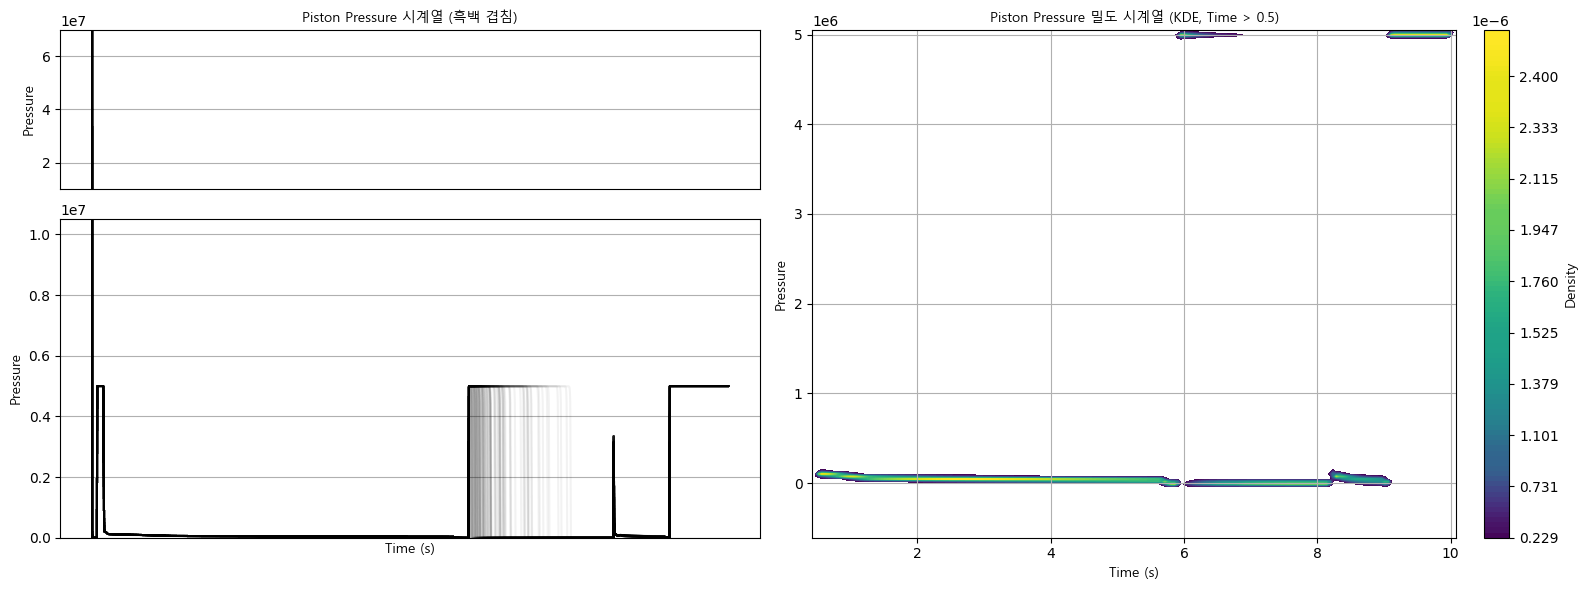

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Pressure 데이터 병합
pressure_frames = []
for fpath in selected_files['Piston_Pressure']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    pressure_frames.append(df)

pressure_df = pd.concat(pressure_frames, ignore_index=True)

# ⏱ float 변환
pressure_df["Time"] = pressure_df["Time"].astype(str).str.replace("초", "").astype(float)
pressure_df["Piston_Pressure"] = pressure_df["Piston_Pressure"].astype(float)

# 🎨 시각화 구성 (3패널: 생략 포함 좌측 + KDE 우측)
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2])  # 상단 축은 작게

# ▶ 고압 영역 (상단)
ax_high = plt.subplot(gs[0, 0], sharex=None)
for _, group in pressure_df.groupby("source_file"):
    ax_high.plot(group["Time"], group["Piston_Pressure"], color='black', alpha=0.05)
ax_high.set_ylim(1e7, 7e7)
ax_high.set_ylabel("Pressure", fontproperties=fontprop)
ax_high.set_xticks([])  # 하단 축 생략
ax_high.set_title("Piston Pressure 시계열 (흑백 겹침)", fontproperties=fontprop)
ax_high.grid(True)

# ▶ 저압 영역 (하단)
ax_low = plt.subplot(gs[1, 0], sharex=ax_high)
for _, group in pressure_df.groupby("source_file"):
    ax_low.plot(group["Time"], group["Piston_Pressure"], color='black', alpha=0.05)
ax_low.set_xlabel("Time (s)", fontproperties=fontprop)
ax_low.set_ylabel("Pressure", fontproperties=fontprop)
low_max = pressure_df["Piston_Pressure"].clip(upper=1e7).max()
ax_low.set_ylim(0, low_max * 1.05)
ax_low.grid(True)

# ▶ KDE 영역 (우측)
ax_kde = plt.subplot(gs[:, 1])  # 전체 세로 사용
kde = sns.kdeplot(
    data=pressure_df[pressure_df["Time"] > 0.5],
    x="Time",
    y="Piston_Pressure",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=ax_kde
)
ax_kde.set_title("Piston Pressure 밀도 시계열 (KDE, Time > 0.5)", fontproperties=fontprop)
ax_kde.set_xlabel("Time (s)", fontproperties=fontprop)
ax_kde.set_ylabel("Pressure", fontproperties=fontprop)
ax_kde.grid(True)

# ▶ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=ax_kde, orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

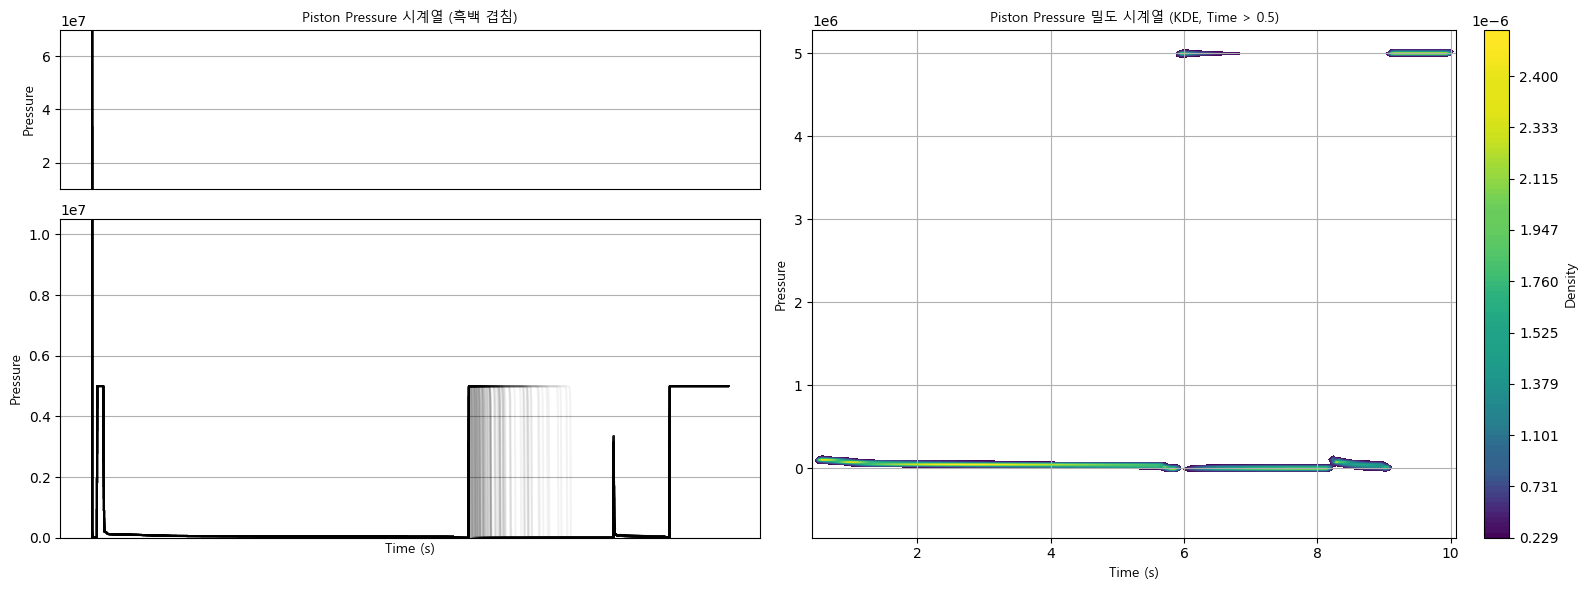

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Pressure 데이터 병합
pressure_frames = []
for fpath in selected_files['Piston_Pressure']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    pressure_frames.append(df)

pressure_df = pd.concat(pressure_frames, ignore_index=True)

# ⏱ float 변환
pressure_df["Time"] = pressure_df["Time"].astype(str).str.replace("초", "").astype(float)
pressure_df["Piston_Pressure"] = pressure_df["Piston_Pressure"].astype(float)

# Time > 0.5 필터링 데이터 (KDE용)
kde_df = pressure_df[pressure_df["Time"] > 0.5]

# 🎨 시각화 구성
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2])  # 2행 2열: 왼쪽 생략, 오른쪽 KDE

# ▶ 왼쪽 상단: 고압 영역
ax_high = plt.subplot(gs[0, 0])
for _, group in pressure_df.groupby("source_file"):
    ax_high.plot(group["Time"], group["Piston_Pressure"], color='black', alpha=0.05)
ax_high.set_ylim(1e7, 7e7)
ax_high.set_ylabel("Pressure", fontproperties=fontprop)
ax_high.set_xticks([])
ax_high.set_title("Piston Pressure 시계열 (흑백 겹침)", fontproperties=fontprop)
ax_high.grid(True)

# ▶ 왼쪽 하단: 저압 영역
ax_low = plt.subplot(gs[1, 0], sharex=ax_high)
for _, group in pressure_df.groupby("source_file"):
    ax_low.plot(group["Time"], group["Piston_Pressure"], color='black', alpha=0.05)
ax_low.set_xlabel("Time (s)", fontproperties=fontprop)
ax_low.set_ylabel("Pressure", fontproperties=fontprop)
low_max = pressure_df["Piston_Pressure"].clip(upper=1e7).max()
ax_low.set_ylim(0, low_max * 1.05)
ax_low.grid(True)

# ▶ 오른쪽 전체: KDE
ax_kde = plt.subplot(gs[:, 1])
kde = sns.kdeplot(
    data=kde_df,
    x="Time",
    y="Piston_Pressure",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=ax_kde
)
ax_kde.set_title("Piston Pressure 밀도 시계열 (KDE, Time > 0.5)", fontproperties=fontprop)
ax_kde.set_xlabel("Time (s)", fontproperties=fontprop)
ax_kde.set_ylabel("Pressure", fontproperties=fontprop)
ax_kde.grid(True)

# ▶ y축 padding
ymin_kde = kde_df["Piston_Pressure"].min()
ymax_kde = kde_df["Piston_Pressure"].max()
yrange = ymax_kde - ymin_kde
ax_kde.set_ylim(ymin_kde - 0.05 * yrange, ymax_kde + 0.05 * yrange)

# ▶ colorbar
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=ax_kde, orientation="vertical", fraction=0.04, pad=0.04)\
    .set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

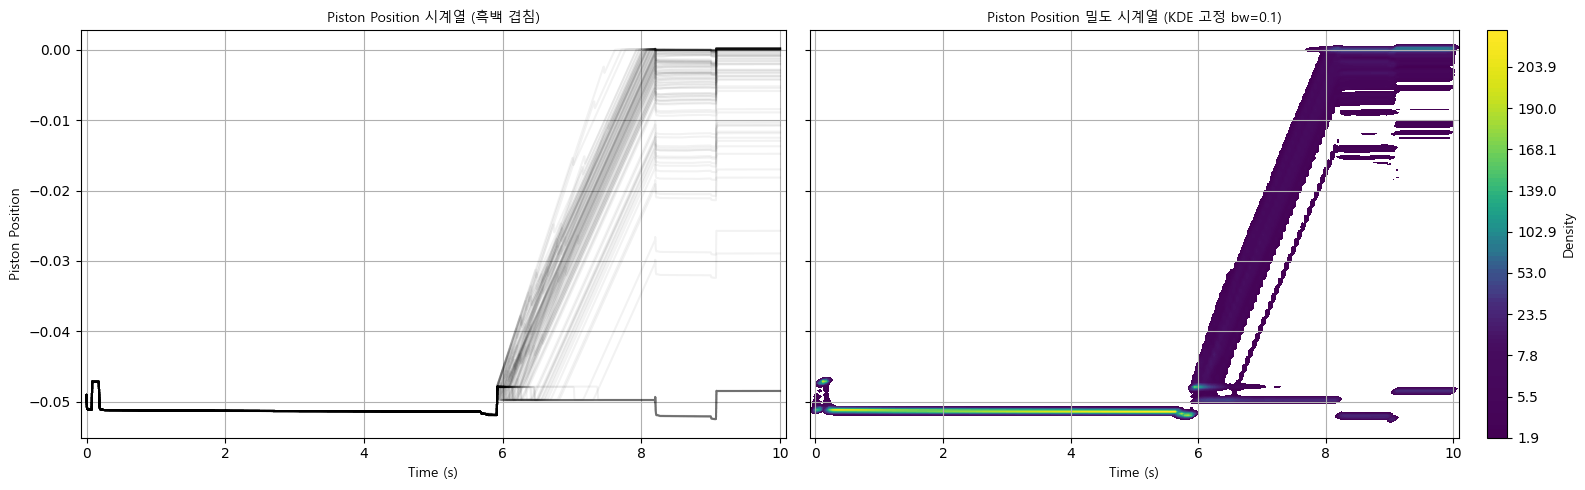

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Position 데이터 병합
position_frames = []
for fpath in selected_files['Piston_Position']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    position_frames.append(df)

position_df = pd.concat(position_frames, ignore_index=True)

# ⏱ float 변환
position_df["Time"] = position_df["Time"].astype(str).str.replace("초", "").astype(float)
position_df["Piston_Position"] = position_df["Piston_Position"].astype(float)

# 🎨 subplot 구성 (좌: 흑백, 우: KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

# ▶ 좌측: 흑백 시계열
for _, group in position_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Piston_Position"], color='black', alpha=0.05)
axes[0].set_title("Piston Position 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Piston Position", fontproperties=fontprop)
axes[0].grid(True)

# ▶ 우측: KDE 시각화
kde = sns.kdeplot(
    data=position_df,
    x="Time",
    y="Piston_Position",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Piston Position 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ▶ y축 여유 padding (5%)
ymin, ymax = position_df["Piston_Position"].min(), position_df["Piston_Position"].max()
yrange = ymax - ymin
axes[0].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)
axes[1].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)

# ▶ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04)\
    .set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

ValueError: Contour levels must be increasing

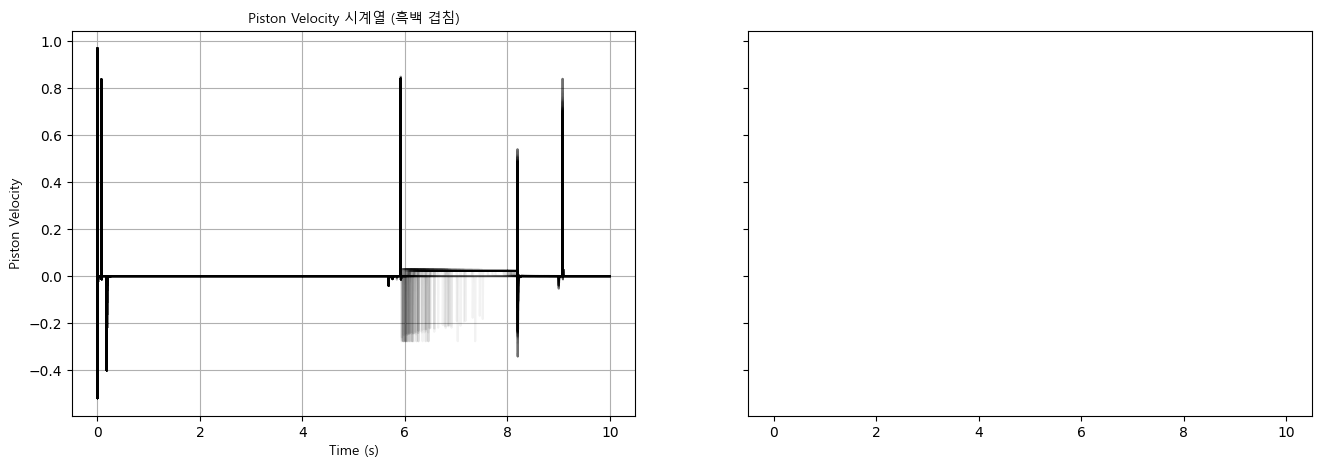

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Velocity 데이터 병합
velocity_frames = []
for fpath in selected_files['Piston_Velocity']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    velocity_frames.append(df)

velocity_df = pd.concat(velocity_frames, ignore_index=True)

# ⏱ float 변환
velocity_df["Time"] = velocity_df["Time"].astype(str).str.replace("초", "").astype(float)
velocity_df["Piston_Velocity"] = velocity_df["Piston_Velocity"].astype(float)

# 🎨 subplot 구성 (좌: 흑백, 우: KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in velocity_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Piston_Velocity"], color='black', alpha=0.05)
axes[0].set_title("Piston Velocity 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Piston Velocity", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE + colorbar
kde = sns.kdeplot(
    data=velocity_df,
    x="Time",
    y="Piston_Velocity",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Piston Velocity 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ▶ y축 padding 5% 적용
ymin, ymax = velocity_df["Piston_Velocity"].min(), velocity_df["Piston_Velocity"].max()
yrange = ymax - ymin
axes[0].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)
axes[1].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)

# ▶ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()


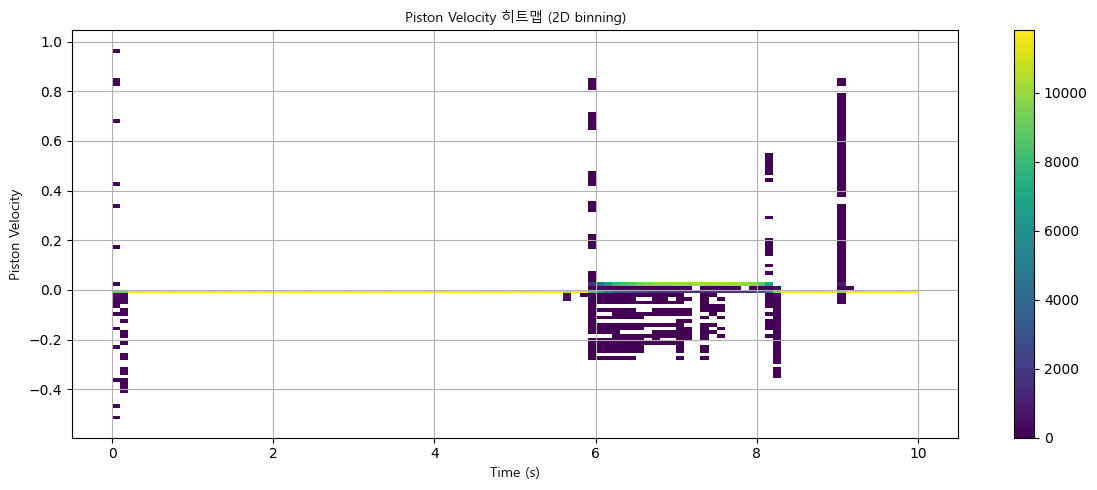

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 데이터 병합
velocity_frames = []
for fpath in selected_files['Piston_Velocity']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    velocity_frames.append(df)

velocity_df = pd.concat(velocity_frames, ignore_index=True)

# ⏱ 변환
velocity_df["Time"] = velocity_df["Time"].astype(str).str.replace("초", "").astype(float)
velocity_df["Piston_Velocity"] = velocity_df["Piston_Velocity"].astype(float)

# 🎨 시각화 구성
plt.figure(figsize=(12, 5))
sns.histplot(
    data=velocity_df,
    x="Time",
    y="Piston_Velocity",
    bins=100,
    cmap="viridis",
    cbar=True
)

plt.title("Piston Velocity 히트맵 (2D binning)", fontproperties=fontprop)
plt.xlabel("Time (s)", fontproperties=fontprop)
plt.ylabel("Piston Velocity", fontproperties=fontprop)
plt.grid(True)
plt.tight_layout()
plt.show()

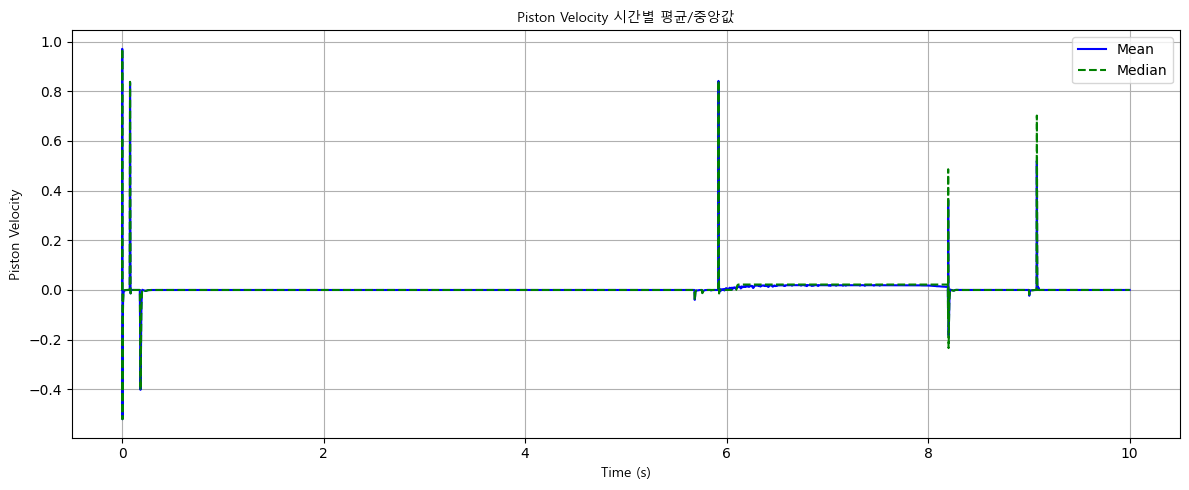

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 데이터 병합
velocity_frames = []
for fpath in selected_files['Piston_Velocity']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    velocity_frames.append(df)

velocity_df = pd.concat(velocity_frames, ignore_index=True)

# ⏱ 변환
velocity_df["Time"] = velocity_df["Time"].astype(str).str.replace("초", "").astype(float)
velocity_df["Piston_Velocity"] = velocity_df["Piston_Velocity"].astype(float)

# 🔄 시간 기준으로 groupby 후 평균/중앙값 계산
summary_df = velocity_df.groupby("Time")["Piston_Velocity"].agg(["mean", "median", "std"])

# 🎨 시각화
plt.figure(figsize=(12, 5))
plt.plot(summary_df.index, summary_df["mean"], label="Mean", color="blue")
plt.plot(summary_df.index, summary_df["median"], label="Median", color="green", linestyle="--")

plt.title("Piston Velocity 시간별 평균/중앙값", fontproperties=fontprop)
plt.xlabel("Time (s)", fontproperties=fontprop)
plt.ylabel("Piston Velocity", fontproperties=fontprop)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

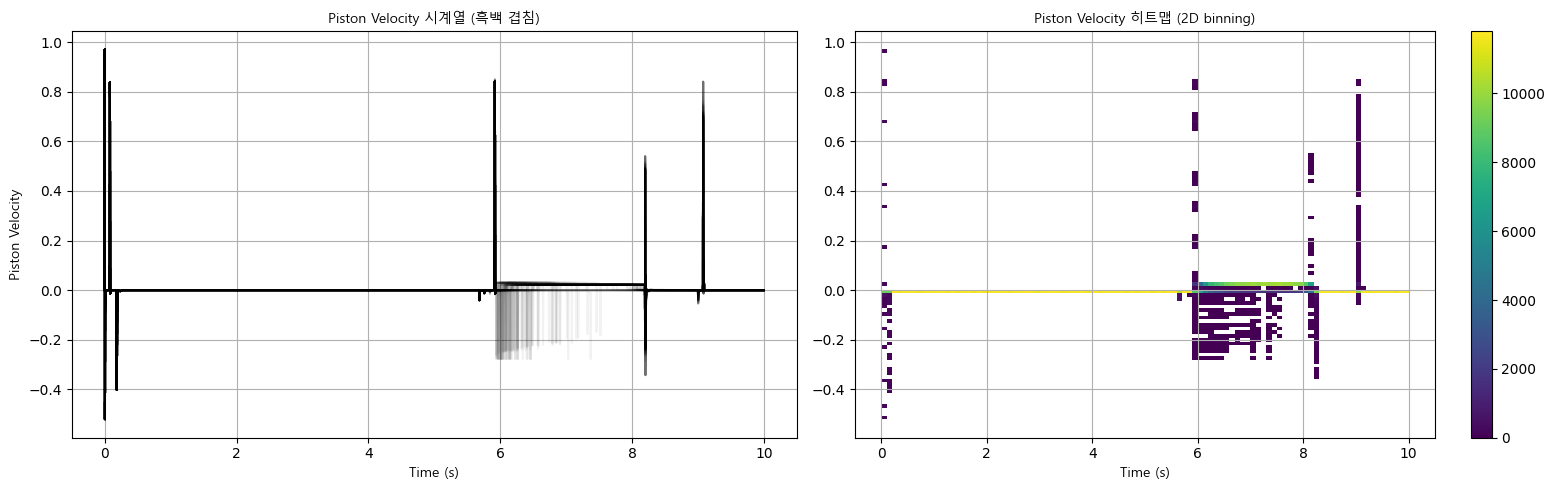

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Velocity 데이터 병합
velocity_frames = []
for fpath in selected_files['Piston_Velocity']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    velocity_frames.append(df)

velocity_df = pd.concat(velocity_frames, ignore_index=True)

# ⏱ float 변환
velocity_df["Time"] = velocity_df["Time"].astype(str).str.replace("초", "").astype(float)
velocity_df["Piston_Velocity"] = velocity_df["Piston_Velocity"].astype(float)

# 🎨 subplot 구성 (좌: 시계열, 우: 히트맵)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

# ▶ 좌측: 흑백 시계열 겹침
for _, group in velocity_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Piston_Velocity"], color='black', alpha=0.05)
axes[0].set_title("Piston Velocity 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Piston Velocity", fontproperties=fontprop)
axes[0].grid(True)

# ▶ 우측: 히트맵
sns.histplot(
    data=velocity_df,
    x="Time",
    y="Piston_Velocity",
    bins=100,
    cmap="viridis",
    cbar=True,
    ax=axes[1]
)
axes[1].set_title("Piston Velocity 히트맵 (2D binning)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")  # y축 레이블 생략
axes[1].grid(True)

plt.tight_layout()
plt.show()

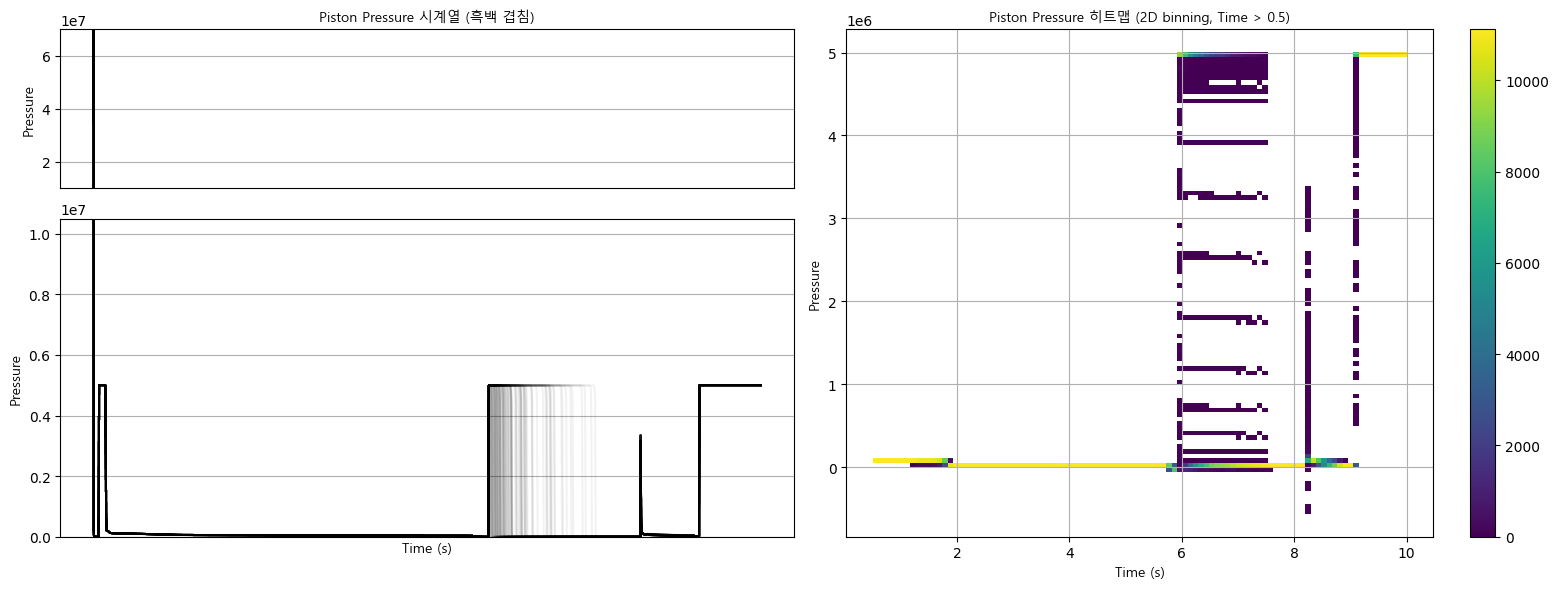

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Piston_Pressure 데이터 병합
pressure_frames = []
for fpath in selected_files['Piston_Pressure']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    pressure_frames.append(df)

pressure_df = pd.concat(pressure_frames, ignore_index=True)

# ⏱ float 변환
pressure_df["Time"] = pressure_df["Time"].astype(str).str.replace("초", "").astype(float)
pressure_df["Piston_Pressure"] = pressure_df["Piston_Pressure"].astype(float)

# Time > 0.5 필터링 데이터 (히트맵용)
hist_df = pressure_df[pressure_df["Time"] > 0.5]

# 🎨 시각화 구성
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2])  # 2행 2열: 왼쪽 생략, 오른쪽 히트맵

# ▶ 왼쪽 상단: 고압 영역
ax_high = plt.subplot(gs[0, 0])
for _, group in pressure_df.groupby("source_file"):
    ax_high.plot(group["Time"], group["Piston_Pressure"], color='black', alpha=0.05)
ax_high.set_ylim(1e7, 7e7)
ax_high.set_ylabel("Pressure", fontproperties=fontprop)
ax_high.set_xticks([])
ax_high.set_title("Piston Pressure 시계열 (흑백 겹침)", fontproperties=fontprop)
ax_high.grid(True)

# ▶ 왼쪽 하단: 저압 영역
ax_low = plt.subplot(gs[1, 0], sharex=ax_high)
for _, group in pressure_df.groupby("source_file"):
    ax_low.plot(group["Time"], group["Piston_Pressure"], color='black', alpha=0.05)
ax_low.set_xlabel("Time (s)", fontproperties=fontprop)
ax_low.set_ylabel("Pressure", fontproperties=fontprop)
low_max = pressure_df["Piston_Pressure"].clip(upper=1e7).max()
ax_low.set_ylim(0, low_max * 1.05)
ax_low.grid(True)

# ▶ 오른쪽 전체: 히트맵
ax_hist = plt.subplot(gs[:, 1])
sns.histplot(
    data=hist_df,
    x="Time",
    y="Piston_Pressure",
    bins=100,
    cmap="viridis",
    cbar=True,
    ax=ax_hist
)
ax_hist.set_title("Piston Pressure 히트맵 (2D binning, Time > 0.5)", fontproperties=fontprop)
ax_hist.set_xlabel("Time (s)", fontproperties=fontprop)
ax_hist.set_ylabel("Pressure", fontproperties=fontprop)
ax_hist.grid(True)

plt.tight_layout()
plt.show()

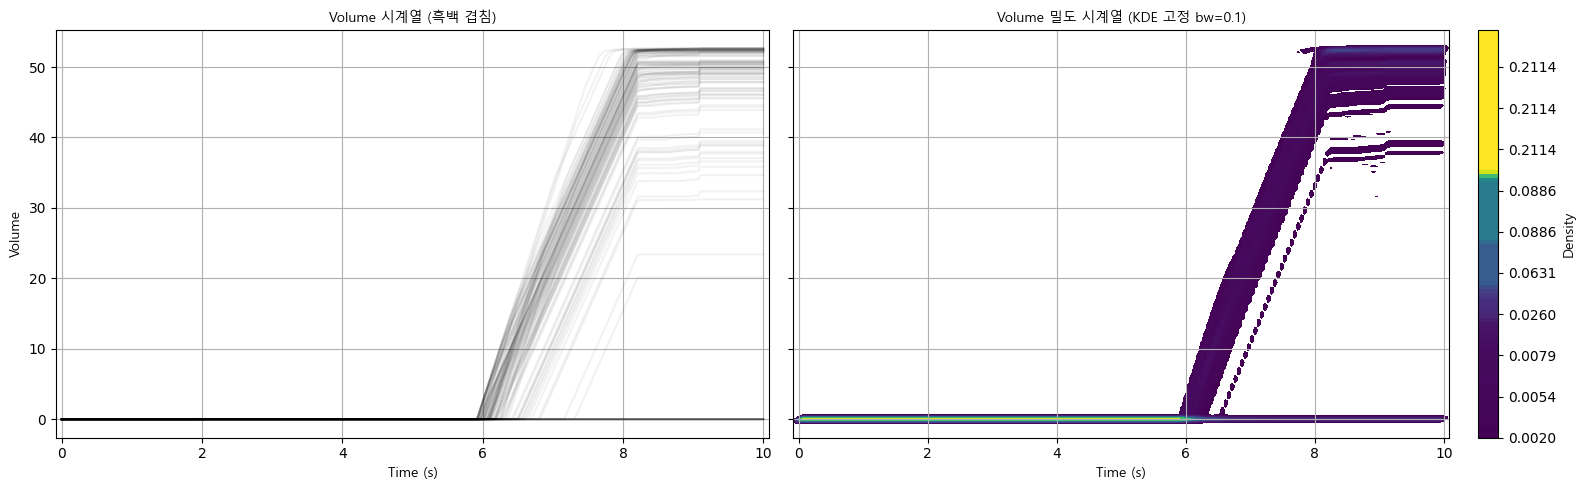

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Volume 데이터 병합
volume_frames = []
for fpath in selected_files['Volume']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    volume_frames.append(df)

volume_df = pd.concat(volume_frames, ignore_index=True)

# ⏱ float 변환
volume_df["Time"] = volume_df["Time"].astype(str).str.replace("초", "").astype(float)
volume_df["Volume"] = volume_df["Volume"].astype(float)

# 🎨 subplot 구성 (좌: 흑백, 우: KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in volume_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Volume"], color='black', alpha=0.05)
axes[0].set_title("Volume 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Volume", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE + colorbar
kde = sns.kdeplot(
    data=volume_df,
    x="Time",
    y="Volume",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Volume 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ▶ y축 padding 5% 적용
ymin, ymax = volume_df["Volume"].min(), volume_df["Volume"].max()
yrange = ymax - ymin
axes[0].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)
axes[1].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)

# ▶ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04).set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

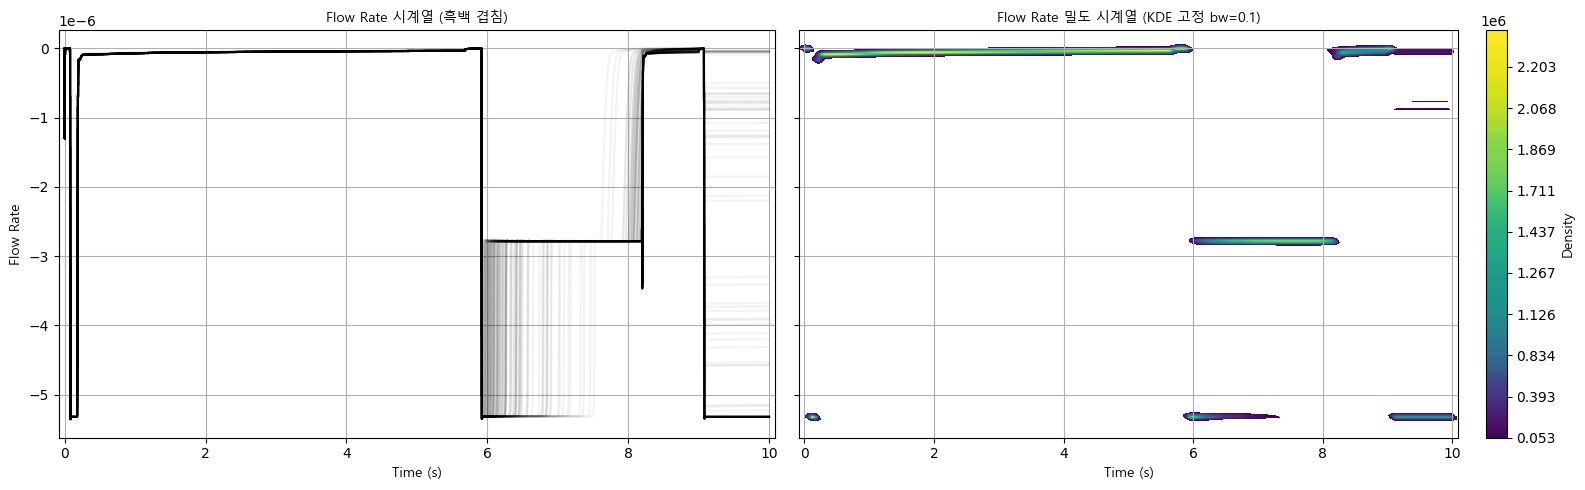

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/mnt/c/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 🔁 Flow_Rate 데이터 병합
flow_frames = []
for fpath in selected_files['Flow_Rate']:
    df = pd.read_csv(fpath)
    df['source_file'] = fpath
    flow_frames.append(df)

flow_df = pd.concat(flow_frames, ignore_index=True)

# ⏱ float 변환
flow_df["Time"] = flow_df["Time"].astype(str).str.replace("초", "").astype(float)
flow_df["Flow_Rate"] = flow_df["Flow_Rate"].astype(float)

# 🎨 subplot 구성 (좌: 흑백, 우: KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

## ▶ 좌측: 흑백 시계열 겹침
for _, group in flow_df.groupby("source_file"):
    axes[0].plot(group["Time"], group["Flow_Rate"], color='black', alpha=0.05)
axes[0].set_title("Flow Rate 시계열 (흑백 겹침)", fontproperties=fontprop)
axes[0].set_xlabel("Time (s)", fontproperties=fontprop)
axes[0].set_ylabel("Flow Rate", fontproperties=fontprop)
axes[0].grid(True)

## ▶ 우측: KDE + colorbar
kde = sns.kdeplot(
    data=flow_df,
    x="Time",
    y="Flow_Rate",
    fill=True,
    cmap="viridis",
    bw_adjust=0.1,
    thresh=0.05,
    levels=100,
    ax=axes[1]
)
axes[1].set_title("Flow Rate 밀도 시계열 (KDE 고정 bw=0.1)", fontproperties=fontprop)
axes[1].set_xlabel("Time (s)", fontproperties=fontprop)
axes[1].set_ylabel("")
axes[1].grid(True)

# ▶ y축 padding 5% 적용
ymin, ymax = flow_df["Flow_Rate"].min(), flow_df["Flow_Rate"].max()
yrange = ymax - ymin
axes[0].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)
axes[1].set_ylim(ymin - 0.05 * yrange, ymax + 0.05 * yrange)

# ▶ colorbar 추가
mappable = kde.get_children()[0]
plt.colorbar(mappable, ax=axes[1], orientation="vertical", fraction=0.04, pad=0.04)\
    .set_label("Density", fontproperties=fontprop)

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 분석 대상 공정 출력
target_var = "Piston_Position"

# 제어 입력 변수
control_vars = ["Inject", "Backpr", "Nozzle", "Retract", "Extruder"]

# 🔁 117개씩 병합
frames = []
for i in range(117):
    dfs = []
    base_time = None

    for var in control_vars + [target_var]:
        df = pd.read_csv(selected_files[var][i])

        if base_time is None:
            base_time = df[["Time"]].copy()
            base_time["Time"] = base_time["Time"].astype(str).str.replace("초", "").astype(float)

        df_val = df[[var]].astype(float).reset_index(drop=True)
        dfs.append(df_val)

    merged = pd.concat([base_time] + dfs, axis=1)
    frames.append(merged)

# 통합 데이터프레임 생성
df_all = pd.concat(frames, ignore_index=True)
df_all.dropna(inplace=True)

# ✅ Granger Causality: 다중 변수 X → 단일 Y
print(f"🔎 Granger Causality Test: {control_vars} ➞ {target_var}")
for var in control_vars:
    test_data = df_all[[target_var, var]]
    print(f"\n👉 {var} ➞ {target_var}")
    grangercausalitytests(test_data, maxlag=5, verbose=True)

🔎 Granger Causality Test: ['Inject', 'Backpr', 'Nozzle', 'Retract', 'Extruder'] ➞ Piston_Position

👉 Inject ➞ Piston_Position

Granger Causality
number of lags (no zero) 1


/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=66.9811 , p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=66.9812 , p=0.0000  , df=1
likelihood ratio test: chi2=66.9793 , p=0.0000  , df=1
parameter F test:         F=66.9811 , p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.4213 , p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=66.8429 , p=0.0000  , df=2
likelihood ratio test: chi2=66.8410 , p=0.0000  , df=2
parameter F test:         F=33.4213 , p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=22.6255 , p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=67.8770 , p=0.0000  , df=3
likelihood ratio test: chi2=67.8750 , p=0.0000  , df=3
parameter F test:         F=22.6255 , p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=17.2481 , p=0.0000  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=44.0582 , p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=44.0583 , p=0.0000  , df=1
likelihood ratio test: chi2=44.0574 , p=0.0000  , df=1
parameter F test:         F=44.0582 , p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=32.2155 , p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=64.4312 , p=0.0000  , df=2
likelihood ratio test: chi2=64.4294 , p=0.0000  , df=2
parameter F test:         F=32.2155 , p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=25.4833 , p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=76.4503 , p=0.0000  , df=3
likelihood ratio test: chi2=76.4478 , p=0.0000  , df=3
parameter F test:         F=25.4833 , p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=14.5756 , p=0.0000  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=1004.6931, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=1004.6957, p=0.0000  , df=1
likelihood ratio test: chi2=1004.2646, p=0.0000  , df=1
parameter F test:         F=1004.6931, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=513.0692, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=1026.1428, p=0.0000  , df=2
likelihood ratio test: chi2=1025.6931, p=0.0000  , df=2
parameter F test:         F=513.0692, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=337.0283, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=1011.0908, p=0.0000  , df=3
likelihood ratio test: chi2=1010.6543, p=0.0000  , df=3
parameter F test:         F=337.0283, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=248.8236, p=0.0000  , df_denom=117

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=583.5699, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=583.5714, p=0.0000  , df=1
likelihood ratio test: chi2=583.4259, p=0.0000  , df=1
parameter F test:         F=583.5699, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=298.7663, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=597.5351, p=0.0000  , df=2
likelihood ratio test: chi2=597.3826, p=0.0000  , df=2
parameter F test:         F=298.7663, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=195.4899, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=586.4731, p=0.0000  , df=3
likelihood ratio test: chi2=586.3262, p=0.0000  , df=3
parameter F test:         F=195.4899, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=143.7455, p=0.0000  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=589.6244, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=589.6259, p=0.0000  , df=1
likelihood ratio test: chi2=589.4774, p=0.0000  , df=1
parameter F test:         F=589.6244, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=304.0736, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=608.1498, p=0.0000  , df=2
likelihood ratio test: chi2=607.9919, p=0.0000  , df=2
parameter F test:         F=304.0736, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=199.2021, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=597.6098, p=0.0000  , df=3
likelihood ratio test: chi2=597.4572, p=0.0000  , df=3
parameter F test:         F=199.2021, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=146.6265, p=0.0000  , df_denom=1170104, df

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 🎯 분석 대상 공정 출력
target_var = "Piston_Pressure"

# 🎮 제어 입력 변수
control_vars = ["Inject", "Backpr", "Nozzle", "Retract", "Extruder"]

# 🔁 117개씩 병합
frames = []
for i in range(117):
    dfs = []
    base_time = None

    for var in control_vars + [target_var]:
        df = pd.read_csv(selected_files[var][i])

        if base_time is None:
            base_time = df[["Time"]].copy()
            base_time["Time"] = base_time["Time"].astype(str).str.replace("초", "").astype(float)

        df_val = df[[var]].astype(float).reset_index(drop=True)
        dfs.append(df_val)

    merged = pd.concat([base_time] + dfs, axis=1)
    frames.append(merged)

# 🧱 통합 데이터프레임 생성
df_all = pd.concat(frames, ignore_index=True)
df_all.dropna(inplace=True)

# ✅ Granger Causality Test 실행
print(f"🔎 Granger Causality Test: {control_vars} ➞ {target_var}")
for var in control_vars:
    test_data = df_all[[target_var, var]]
    print(f"\n👉 {var} ➞ {target_var}")
    grangercausalitytests(test_data, maxlag=5, verbose=True)

🔎 Granger Causality Test: ['Inject', 'Backpr', 'Nozzle', 'Retract', 'Extruder'] ➞ Piston_Pressure

👉 Inject ➞ Piston_Pressure

Granger Causality
number of lags (no zero) 1


/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=22632.3875, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=22632.4455, p=0.0000  , df=1
likelihood ratio test: chi2=22416.3486, p=0.0000  , df=1
parameter F test:         F=22632.3875, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4443.8115, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=8887.6610, p=0.0000  , df=2
likelihood ratio test: chi2=8854.0776, p=0.0000  , df=2
parameter F test:         F=4443.8115, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1663.8977, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=4991.7231, p=0.0000  , df=3
likelihood ratio test: chi2=4981.1059, p=0.0000  , df=3
parameter F test:         F=1663.8977, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=838.8520, p=0.0000  , df_d

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=24498.6741, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=24498.7369, p=0.0000  , df=1
likelihood ratio test: chi2=24245.7961, p=0.0000  , df=1
parameter F test:         F=24498.6741, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33042.0643, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=66084.4110, p=0.0000  , df=2
likelihood ratio test: chi2=64285.7053, p=0.0000  , df=2
parameter F test:         F=33042.0643, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21231.9133, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=63696.1208, p=0.0000  , df=3
likelihood ratio test: chi2=62022.8998, p=0.0000  , df=3
parameter F test:         F=21231.9133, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=14519.7706, p=0.00

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=172.9452, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=172.9457, p=0.0000  , df=1
likelihood ratio test: chi2=172.9329, p=0.0000  , df=1
parameter F test:         F=172.9452, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=39.4719 , p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=78.9441 , p=0.0000  , df=2
likelihood ratio test: chi2=78.9414 , p=0.0000  , df=2
parameter F test:         F=39.4719 , p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=17.7073 , p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=53.1223 , p=0.0000  , df=3
likelihood ratio test: chi2=53.1211 , p=0.0000  , df=3
parameter F test:         F=17.7073 , p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.8296 , p=0.0000  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1655.7427, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=1655.7469, p=0.0000  , df=1
likelihood ratio test: chi2=1654.5765, p=0.0000  , df=1
parameter F test:         F=1655.7427, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=351.7166, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=703.4362, p=0.0000  , df=2
likelihood ratio test: chi2=703.2248, p=0.0000  , df=2
parameter F test:         F=351.7166, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=146.2206, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=438.6645, p=0.0000  , df=3
likelihood ratio test: chi2=438.5823, p=0.0000  , df=3
parameter F test:         F=146.2206, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:   

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=62.5882 , p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=62.5883 , p=0.0000  , df=1
likelihood ratio test: chi2=62.5866 , p=0.0000  , df=1
parameter F test:         F=62.5882 , p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.7885 , p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=23.5771 , p=0.0000  , df=2
likelihood ratio test: chi2=23.5768 , p=0.0000  , df=2
parameter F test:         F=11.7885 , p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1963  , p=0.0056  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=12.5891 , p=0.0056  , df=3
likelihood ratio test: chi2=12.5890 , p=0.0056  , df=3
parameter F test:         F=4.1963  , p=0.0056  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9955  , p=0.0922  , df_denom=1170104, df

In [4]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 분석 대상 공정 출력
target_var = "Piston_Velocity"

# 제어 입력 변수
control_vars = ["Inject", "Backpr", "Nozzle", "Retract", "Extruder"]

# 🔁 117개씩 병합
frames = []
for i in range(117):
    dfs = []
    base_time = None

    for var in control_vars + [target_var]:
        df = pd.read_csv(selected_files[var][i])

        if base_time is None:
            base_time = df[["Time"]].copy()
            base_time["Time"] = base_time["Time"].astype(str).str.replace("초", "").astype(float)

        df_val = df[[var]].astype(float).reset_index(drop=True)
        dfs.append(df_val)

    merged = pd.concat([base_time] + dfs, axis=1)
    frames.append(merged)

# 통합 데이터프레임 생성
df_all = pd.concat(frames, ignore_index=True)
df_all.dropna(inplace=True)

# ✅ Granger Causality Test 실행
print(f"🔎 Granger Causality Test: {control_vars} ➞ {target_var}")
for var in control_vars:
    test_data = df_all[[target_var, var]]
    print(f"\n👉 {var} ➞ {target_var}")
    grangercausalitytests(test_data, maxlag=5, verbose=True)

🔎 Granger Causality Test: ['Inject', 'Backpr', 'Nozzle', 'Retract', 'Extruder'] ➞ Piston_Velocity

👉 Inject ➞ Piston_Velocity

Granger Causality
number of lags (no zero) 1


/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=6155.4452, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=6155.4610, p=0.0000  , df=1
likelihood ratio test: chi2=6139.3270, p=0.0000  , df=1
parameter F test:         F=6155.4452, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3099.8094, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=6199.6452, p=0.0000  , df=2
likelihood ratio test: chi2=6183.2791, p=0.0000  , df=2
parameter F test:         F=3099.8094, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2448.4285, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=7345.3294, p=0.0000  , df=3
likelihood ratio test: chi2=7322.3705, p=0.0000  , df=3
parameter F test:         F=2448.4285, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2076.9554, p=0.0000  , df_deno

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=6139.2293, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=6139.2451, p=0.0000  , df=1
likelihood ratio test: chi2=6123.1958, p=0.0000  , df=1
parameter F test:         F=6139.2293, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=63436.9070, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=126874.3562, p=0.0000  , df=2
likelihood ratio test: chi2=120455.9257, p=0.0000  , df=2
parameter F test:         F=63436.9070, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=42771.1058, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=128314.0850, p=0.0000  , df=3
likelihood ratio test: chi2=121754.0914, p=0.0000  , df=3
parameter F test:         F=42771.1058, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=32754.6405, p=0.00

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=7550.9806, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=7551.0000, p=0.0000  , df=1
likelihood ratio test: chi2=7526.7402, p=0.0000  , df=1
parameter F test:         F=7550.9806, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3794.4229, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=7588.8782, p=0.0000  , df=2
likelihood ratio test: chi2=7564.3750, p=0.0000  , df=2
parameter F test:         F=3794.4229, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2985.7599, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=8957.3332, p=0.0000  , df=3
likelihood ratio test: chi2=8923.2225, p=0.0000  , df=3
parameter F test:         F=2985.7599, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2531.2004, p=0.0000  , df_deno

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=5385.1577, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=5385.1715, p=0.0000  , df=1
likelihood ratio test: chi2=5372.8175, p=0.0000  , df=1
parameter F test:         F=5385.1577, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2699.3101, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=5398.6433, p=0.0000  , df=2
likelihood ratio test: chi2=5386.2274, p=0.0000  , df=2
parameter F test:         F=2699.3101, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2120.8707, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=6362.6503, p=0.0000  , df=3
likelihood ratio test: chi2=6345.4138, p=0.0000  , df=3
parameter F test:         F=2120.8707, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1795.1741, p=0.0000  , df_deno

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=6591.1319, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=6591.1488, p=0.0000  , df=1
likelihood ratio test: chi2=6572.6545, p=0.0000  , df=1
parameter F test:         F=6591.1319, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3358.3046, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=6716.6380, p=0.0000  , df=2
likelihood ratio test: chi2=6697.4342, p=0.0000  , df=2
parameter F test:         F=3358.3046, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2657.0870, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=7971.3088, p=0.0000  , df=3
likelihood ratio test: chi2=7944.2795, p=0.0000  , df=3
parameter F test:         F=2657.0870, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2254.6200, p=0.0000  , df_deno

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 분석 대상 공정 출력
target_var = "Volume"

# 제어 입력 변수
control_vars = ["Inject", "Backpr", "Nozzle", "Retract", "Extruder"]

# 🔁 117개씩 병합
frames = []
for i in range(117):
    dfs = []
    base_time = None

    for var in control_vars + [target_var]:
        df = pd.read_csv(selected_files[var][i])

        if base_time is None:
            base_time = df[["Time"]].copy()
            base_time["Time"] = base_time["Time"].astype(str).str.replace("초", "").astype(float)

        df_val = df[[var]].astype(float).reset_index(drop=True)
        dfs.append(df_val)

    merged = pd.concat([base_time] + dfs, axis=1)
    frames.append(merged)

# 통합 데이터프레임 생성
df_all = pd.concat(frames, ignore_index=True)
df_all.dropna(inplace=True)

# ✅ Granger Causality: 다중 변수 X → 단일 Y
print(f"🔎 Granger Causality Test: {control_vars} ➞ {target_var}")
for var in control_vars:
    test_data = df_all[[target_var, var]]
    print(f"\n👉 {var} ➞ {target_var}")
    grangercausalitytests(test_data, maxlag=5, verbose=True)

🔎 Granger Causality Test: ['Inject', 'Backpr', 'Nozzle', 'Retract', 'Extruder'] ➞ Volume

👉 Inject ➞ Volume

Granger Causality
number of lags (no zero) 1


/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=17.2867 , p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=17.2867 , p=0.0000  , df=1
likelihood ratio test: chi2=17.2866 , p=0.0000  , df=1
parameter F test:         F=17.2867 , p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.7101  , p=0.0002  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=17.4202 , p=0.0002  , df=2
likelihood ratio test: chi2=17.4201 , p=0.0002  , df=2
parameter F test:         F=8.7101  , p=0.0002  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.8512  , p=0.0005  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=17.5537 , p=0.0005  , df=3
likelihood ratio test: chi2=17.5536 , p=0.0005  , df=3
parameter F test:         F=5.8512  , p=0.0005  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4218  , p=0.0014  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=13.9492 , p=0.0002  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=13.9492 , p=0.0002  , df=1
likelihood ratio test: chi2=13.9491 , p=0.0002  , df=1
parameter F test:         F=13.9492 , p=0.0002  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.0368  , p=0.0009  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=14.0737 , p=0.0009  , df=2
likelihood ratio test: chi2=14.0736 , p=0.0009  , df=2
parameter F test:         F=7.0368  , p=0.0009  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8137  , p=0.0024  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=14.4412 , p=0.0024  , df=3
likelihood ratio test: chi2=14.4412 , p=0.0024  , df=3
parameter F test:         F=4.8137  , p=0.0024  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7020  , p=0.0051  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=1022.5929, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=1022.5955, p=0.0000  , df=1
likelihood ratio test: chi2=1022.1489, p=0.0000  , df=1
parameter F test:         F=1022.5929, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=511.8652, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=1023.7347, p=0.0000  , df=2
likelihood ratio test: chi2=1023.2871, p=0.0000  , df=2
parameter F test:         F=511.8652, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=341.6235, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=1024.8765, p=0.0000  , df=3
likelihood ratio test: chi2=1024.4279, p=0.0000  , df=3
parameter F test:         F=341.6235, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=256.5035, p=0.0000  , df_denom=117

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=610.1572, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=610.1588, p=0.0000  , df=1
likelihood ratio test: chi2=609.9997, p=0.0000  , df=1
parameter F test:         F=610.1572, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=305.1405, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=610.2836, p=0.0000  , df=2
likelihood ratio test: chi2=610.1245, p=0.0000  , df=2
parameter F test:         F=305.1405, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=203.4679, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=610.4075, p=0.0000  , df=3
likelihood ratio test: chi2=610.2483, p=0.0000  , df=3
parameter F test:         F=203.4679, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=152.6315, p=0.0000  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=529.7888, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=529.7902, p=0.0000  , df=1
likelihood ratio test: chi2=529.6703, p=0.0000  , df=1
parameter F test:         F=529.7888, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=265.1167, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=530.2356, p=0.0000  , df=2
likelihood ratio test: chi2=530.1155, p=0.0000  , df=2
parameter F test:         F=265.1167, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=176.8929, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=530.6819, p=0.0000  , df=3
likelihood ratio test: chi2=530.5616, p=0.0000  , df=3
parameter F test:         F=176.8929, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=132.7813, p=0.0000  , df_denom=1170104, df

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 분석 대상 공정 출력
target_var = "Flow_Rate"

# 제어 입력 변수
control_vars = ["Inject", "Backpr", "Nozzle", "Retract", "Extruder"]

# 🔁 117개씩 병합
frames = []
for i in range(117):
    dfs = []
    base_time = None

    for var in control_vars + [target_var]:
        df = pd.read_csv(selected_files[var][i])

        if base_time is None:
            base_time = df[["Time"]].copy()
            base_time["Time"] = base_time["Time"].astype(str).str.replace("초", "").astype(float)

        df_val = df[[var]].astype(float).reset_index(drop=True)
        dfs.append(df_val)

    merged = pd.concat([base_time] + dfs, axis=1)
    frames.append(merged)

# 통합 데이터프레임 생성
df_all = pd.concat(frames, ignore_index=True)
df_all.dropna(inplace=True)

# ✅ Granger Causality: 다중 변수 X → 단일 Y
print(f"🔎 Granger Causality Test: {control_vars} ➞ {target_var}")
for var in control_vars:
    test_data = df_all[[target_var, var]]
    print(f"\n👉 {var} ➞ {target_var}")
    grangercausalitytests(test_data, maxlag=5, verbose=True)

🔎 Granger Causality Test: ['Inject', 'Backpr', 'Nozzle', 'Retract', 'Extruder'] ➞ Flow_Rate

👉 Inject ➞ Flow_Rate

Granger Causality
number of lags (no zero) 1


/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=4715.4856, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=4715.4977, p=0.0000  , df=1
likelihood ratio test: chi2=4706.0216, p=0.0000  , df=1
parameter F test:         F=4715.4856, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2106.1143, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=4212.2465, p=0.0000  , df=2
likelihood ratio test: chi2=4204.6829, p=0.0000  , df=2
parameter F test:         F=2106.1141, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1491.2349, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=4473.7316, p=0.0000  , df=3
likelihood ratio test: chi2=4465.2011, p=0.0000  , df=3
parameter F test:         F=1491.2357, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1216.7180, p=0.0000  , df_deno

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=1905.8732, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=1905.8781, p=0.0000  , df=1
likelihood ratio test: chi2=1904.3277, p=0.0000  , df=1
parameter F test:         F=1905.8732, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4978.9292, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=9957.9009, p=0.0000  , df=2
likelihood ratio test: chi2=9915.7680, p=0.0000  , df=2
parameter F test:         F=4978.9321, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3093.8779, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=9281.6892, p=0.0000  , df=3
likelihood ratio test: chi2=9245.0701, p=0.0000  , df=3
parameter F test:         F=3093.8780, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1081.4445, p=0.0000  , df_deno

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=3.7749  , p=0.0520  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=3.7749  , p=0.0520  , df=1
likelihood ratio test: chi2=3.7749  , p=0.0520  , df=1
parameter F test:         F=3.7749  , p=0.0520  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=19.9896 , p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=39.9793 , p=0.0000  , df=2
likelihood ratio test: chi2=39.9786 , p=0.0000  , df=2
parameter F test:         F=19.9893 , p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=47.4307 , p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=142.2929, p=0.0000  , df=3
likelihood ratio test: chi2=142.2843, p=0.0000  , df=3
parameter F test:         F=47.4307 , p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=52.8974 , p=0.0000  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=0.5900  , p=0.4424  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=0.5900  , p=0.4424  , df=1
likelihood ratio test: chi2=0.5900  , p=0.4424  , df=1
parameter F test:         F=0.5900  , p=0.4424  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.1092 , p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=30.2185 , p=0.0000  , df=2
likelihood ratio test: chi2=30.2181 , p=0.0000  , df=2
parameter F test:         F=15.1092 , p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=48.5049 , p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=145.5155, p=0.0000  , df=3
likelihood ratio test: chi2=145.5064, p=0.0000  , df=3
parameter F test:         F=48.5050 , p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=57.2723 , p=0.0000  , df_denom=1170104, df

/home/seominhyuk/code/wh04-3rd-3team-OptiMold/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=618.3393, p=0.0000  , df_denom=1170113, df_num=1
ssr based chi2 test:   chi2=618.3409, p=0.0000  , df=1
likelihood ratio test: chi2=618.1776, p=0.0000  , df=1
parameter F test:         F=618.3393, p=0.0000  , df_denom=1170113, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=328.5177, p=0.0000  , df_denom=1170110, df_num=2
ssr based chi2 test:   chi2=657.0382, p=0.0000  , df=2
likelihood ratio test: chi2=656.8538, p=0.0000  , df=2
parameter F test:         F=328.5182, p=0.0000  , df_denom=1170110, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=279.9121, p=0.0000  , df_denom=1170107, df_num=3
ssr based chi2 test:   chi2=839.7414, p=0.0000  , df=3
likelihood ratio test: chi2=839.4402, p=0.0000  , df=3
parameter F test:         F=279.9119, p=0.0000  , df_denom=1170107, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=242.9247, p=0.0000  , df_denom=1170104, df